___
# Project-11_ Automobile Insurance and Fraud.
___

# Part 1

In [145]:
# importing project dependencies:

# compute dependency
import numpy as np
# dataframe dependency
import pandas as pd
# visualization dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine
# from scraping some data
import webbrowser


import warnings
warnings.filterwarnings('ignore')

In [146]:
# importing in the dataset
df = pd.read_csv('Auto_Insurance_Claims_amount.csv')

In [147]:
# head of the dataset
df.head()

Customer Country State Code     State  Claim Amount Response  Coverage  \
0  BU79786      US         KS    Kansas    276.351928       No     Basic   
1  QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2  AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3  WW63253      US         MO  Missouri    764.586183       No     Basic   
4  HB64268      US         KS    Kansas    281.369258       No     Basic   

  Education Effective To Date EmploymentStatus Gender  Income Location Code  \
0  Bachelor           2/24/11         Employed      F   56274      Suburban   
1  Bachelor           1/31/11       Unemployed      F       0      Suburban   
2  Bachelor           2/19/11         Employed      F   48767      Suburban   
3  Bachelor           1/20/11       Unemployed      M       0      Suburban   
4  Bachelor            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy  Claim Reason  \
0                   1  Corporate Auto  Corporate L3     Collision   
1                   8   Personal Auto   Personal L3  Scratch/Dent   
2                   2   Personal Auto   Personal L3     Collision   
3                   7  Corporate Auto  Corporate L2     Collision   
4                   1   Personal Auto   Personal L1     Collision   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [148]:
# sample of te data
df.sample(5)

Customer Country State Code     State  Claim Amount Response  Coverage  \
6124  WH56217      US         KS    Kansas    892.756582       No     Basic   
4088  EF52334      US         KS    Kansas    326.101744       No  Extended   
5212  CD55111      US         MO  Missouri   3015.468108       No  Extended   
6742  ZC17276      US         MO  Missouri    775.520972       No   Premium   
2631  GG61186      US         OK  Oklahoma    839.580633       No   Premium   

     Education Effective To Date EmploymentStatus Gender  Income  \
6124   College           2/14/11    Medical Leave      M   29136   
4088  Bachelor            2/7/11       Unemployed      M       0   
5212    Master            1/2/11         Employed      M   73359   
6742    Master           1/15/11       Unemployed      M       0   
2631    Doctor           1/11/11       Unemployed      F       0   

     Location Code Marital Status  Monthly Premium Auto  \
6124      Suburban       Divorced                   118   
4088      Suburban       Divorced                    93   
5212         Rural        Married                    94   
6742      Suburban         Single                   110   
2631         Rural        Married                   110   

      Months Since Last Claim  Months Since Policy Inception  \
6124                       16                             72   
4088                       29                             63   
5212                       17                             24   
6742                        7                             90   
2631                       22                             72   

      Number of Open Complaints  Number of Policies     Policy Type  \
6124                          0                   9  Corporate Auto   
4088                          0                   1   Personal Auto   
5212                          0                   2  Corporate Auto   
6742                          0                   5   Personal Auto   
2631                          0                   9   Personal Auto   

            Policy  Claim Reason Sales Channel  Total Claim Amount  \
6124  Corporate L1     Collision         Agent          566.400000   
4088   Personal L1  Scratch/Dent         Agent          669.600000   
5212  Corporate L3          Hail   Call Center          107.187926   
6742   Personal L3     Collision        Branch          528.000000   
2631   Personal L1     Collision         Agent          161.092415   

      Vehicle Class Vehicle Size  
6124            SUV        Large  
4088  Four-Door Car      Medsize  
5212   Two-Door Car      Medsize  
6742  Four-Door Car      Medsize  
2631  Four-Door Car      Medsize

In [149]:
# description on the dataset
df.describe()

Claim Amount        Income  Monthly Premium Auto  \
count   9134.000000   9134.000000           9134.000000   
mean     800.494047  37657.380009             93.219291   
std      687.096761  30379.904734             34.407967   
min      189.800768      0.000000             61.000000   
25%      399.425179      0.000000             68.000000   
50%      578.018220  33889.500000             83.000000   
75%      896.216704  62320.000000            109.000000   
max     8332.538119  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

In [150]:
# inforamtion on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   o

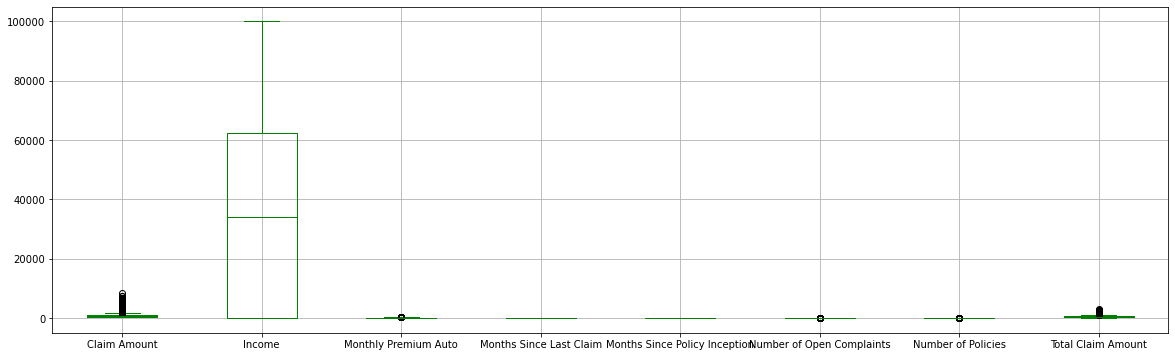

In [151]:
plt.figure(figsize=(20,6))
df.boxplot(color='green')

In [152]:
# colums of the dataset
df.columns,len(df.columns)

(Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
        'Response', 'Coverage', 'Education', 'Effective To Date',
        'EmploymentStatus', 'Gender', 'Income', 'Location Code',
        'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
        'Months Since Policy Inception', 'Number of Open Complaints',
        'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
        'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
       dtype='object'),
 26)

In [153]:
 df.shape

(9134, 26)

In [154]:
# check for any missing or dirty data in the dataset.
df.isna().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [155]:
df

Customer Country State Code     State  Claim Amount Response  Coverage  \
0     BU79786      US         KS    Kansas    276.351928       No     Basic   
1     QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2     AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3     WW63253      US         MO  Missouri    764.586183       No     Basic   
4     HB64268      US         KS    Kansas    281.369258       No     Basic   
...       ...     ...        ...       ...           ...      ...       ...   
9129  LA72316      US         MO  Missouri   2340.598798       No     Basic   
9130  PK87824      US         MO  Missouri    309.651122      Yes  Extended   
9131  TD14365      US         MO  Missouri    816.389043       No  Extended   
9132  UP19263      US         MO  Missouri    752.444244       No  Extended   
9133  Y167826      US         MO  Missouri    261.183687       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  \
0     Bachelor           2/24/11         Employed      F   56274   
1     Bachelor           1/31/11       Unemployed      F       0   
2     Bachelor           2/19/11         Employed      F   48767   
3     Bachelor           1/20/11       Unemployed      M       0   
4     Bachelor            2/3/11         Employed      M   43836   
...        ...               ...              ...    ...     ...   
9129  Bachelor           2/10/11         Employed      M   71941   
9130   College           2/12/11         Employed      F   21604   
9131  Bachelor            2/6/11       Unemployed      M       0   
9132   College            2/3/11         Employed      M   21941   
9133   College           2/14/11       Unemployed      M       0   

     Location Code Marital Status  Monthly Premium Auto  \
0         Suburban        Married                    69   
1         Suburban         Single                    94   
2         Suburban        Married                   108   
3         Suburban        Married                   106   
4            Rural         Single                    73   
...            ...            ...                   ...   
9129         Urban        Married                    73   
9130      Suburban       Divorced                    79   
9131      Suburban         Single                    85   
9132      Suburban        Married                    96   
9133      Suburban         Single                    77   

      Months Since Last Claim  Months Since Policy Inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      Number of Open Complaints  Number of Policies     Policy Type  \
0                             0                   1  Corporate Auto   
1                             0                   8   Personal Auto   
2                             0                   2   Personal Auto   
3                             0                   7  Corporate Auto   
4                             0                   1   Personal Auto   
...                         ...                 ...             ...   
9129                          0                   2   Personal Auto   
9130                          0                   1  Corporate Auto   
9131                          3                   2  Corporate Auto   
9132                          0                   3

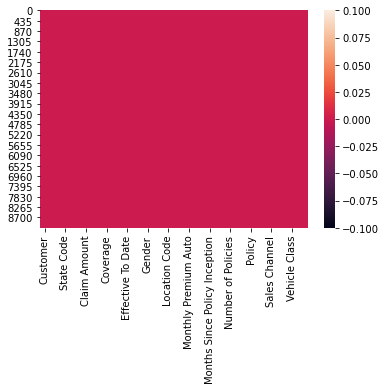

In [156]:
sns.heatmap(df.isna())

In [157]:
# checking for high correaltions 
df.corr()

Claim Amount    Income  Monthly Premium Auto  \
Claim Amount                       1.000000  0.024366              0.396262   
Income                             0.024366  1.000000             -0.016665   
Monthly Premium Auto               0.396262 -0.016665              1.000000   
Months Since Last Claim            0.011517 -0.026715              0.005026   
Months Since Policy Inception      0.009418 -0.000875              0.020257   
Number of Open Complaints         -0.036343  0.006408             -0.013122   
Number of Policies                 0.021955 -0.008656             -0.011233   
Total Claim Amount                 0.226451 -0.355254              0.632017   

                               Months Since Last Claim  \
Claim Amount                                  0.011517   
Income                                       -0.026715   
Monthly Premium Auto                          0.005026   
Months Since Last Claim                       1.000000   
Months Since Policy Inception                -0.042959   
Number of Open Complaints                     0.005354   
Number of Policies                            0.009136   
Total Claim Amount                            0.007563   

                               Months Since Policy Inception  \
Claim Amount                                        0.009418   
Income                                             -0.000875   
Monthly Premium Auto                                0.020257   
Months Since Last Claim                            -0.042959   
Months Since Policy Inception                       1.000000   
Number of Open Complaints                          -0.001158   
Number of Policies                                 -0.013333   
Total Claim Amount                                  0.003335   

                               Number of Open Complaints  Number of Policies  \
Claim Amount                                   -0.036343            0.021955   
Income                                          0.006408           -0.008656   
Monthly Premium Auto                           -0.013122           -0.011233   
Months Since Last Claim                         0.005354            0.009136   
Months Since Policy Inception                  -0.001158           -0.013333   
Number of Open Complaints                       1.000000            0.001498   
Number of Policies                              0.001498            1.000000   
Total Claim Amount                             -0.014241           -0.002354   

                               Total Claim Amount  
Claim Amount                             0.226451  
Income                                  -0.355254  
Monthly Premium Auto                     0.632017  
Months Since Last Claim                  0.007563  
Months Since Policy Inception            0.003335  
Number of Open Complaints               -0.014241  
Number of Policies                      -0.002354  
Total Claim Amount                       1.000000

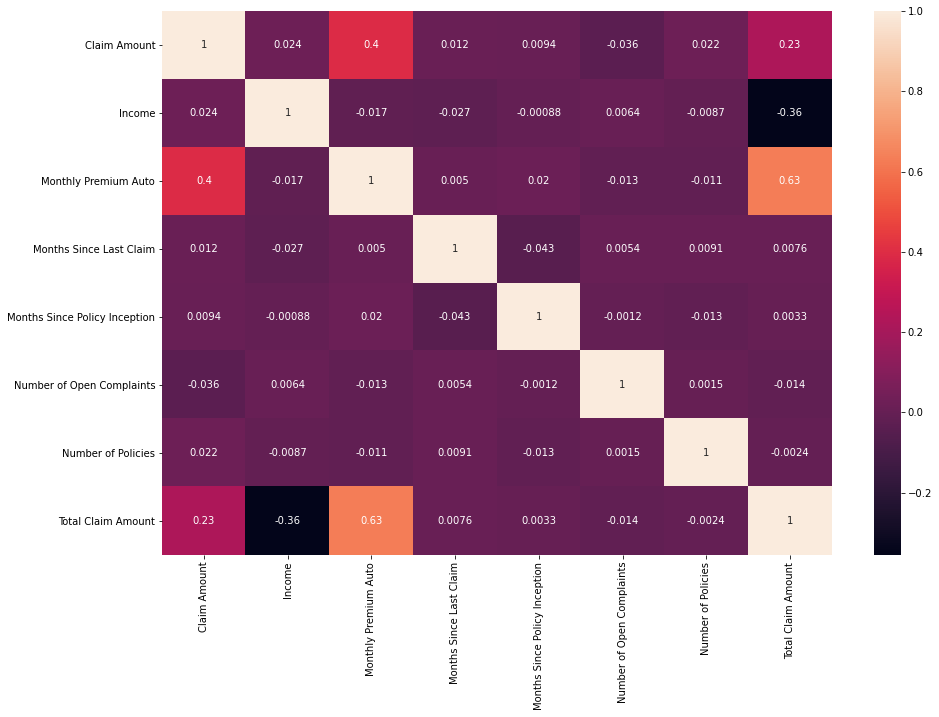

In [158]:
# visualizing the correlations
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [159]:
df.Country.value_counts()

US    9134
Name: Country, dtype: int64

* In this problem, we have to predict the Insurace Claim Amount.
* We have a total of 9134 samples.
* There are total 25 features as 1 Target variable.
* There are no missing values in the dataset.
* There are extreme correaltions in the dataset.
* The dataset is from the States.


## Univariate Analysis

In [160]:
df.head()

Customer Country State Code     State  Claim Amount Response  Coverage  \
0  BU79786      US         KS    Kansas    276.351928       No     Basic   
1  QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2  AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3  WW63253      US         MO  Missouri    764.586183       No     Basic   
4  HB64268      US         KS    Kansas    281.369258       No     Basic   

  Education Effective To Date EmploymentStatus Gender  Income Location Code  \
0  Bachelor           2/24/11         Employed      F   56274      Suburban   
1  Bachelor           1/31/11       Unemployed      F       0      Suburban   
2  Bachelor           2/19/11         Employed      F   48767      Suburban   
3  Bachelor           1/20/11       Unemployed      M       0      Suburban   
4  Bachelor            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy  Claim Reason  \
0                   1  Corporate Auto  Corporate L3     Collision   
1                   8   Personal Auto   Personal L3  Scratch/Dent   
2                   2   Personal Auto   Personal L3     Collision   
3                   7  Corporate Auto  Corporate L2     Collision   
4                   1   Personal Auto   Personal L1     Collision   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [161]:
## State Code and States

In [162]:
df.State.value_counts()

Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64

In [163]:
df['State Code'].value_counts()

MO    3150
IA    2601
NE    1703
OK     882
KS     798
Name: State Code, dtype: int64

In [164]:
df.State.unique()

array(['Kansas', 'Nebraska', 'Oklahoma', 'Missouri', 'Iowa'], dtype=object)

* In this dataset we have data from 5 states of the States.
* Those are 'Kansas', 'Nebraska', 'Oklahoma', 'Missouri', 'Iowa'

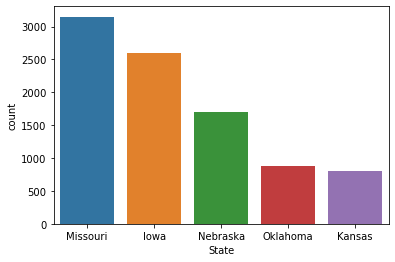

In [165]:
sns.countplot(df.State,order=df.State.value_counts().index)

* Most of the data is from Missori and Iowa.

In [166]:
## Response

In [167]:
df.Response.value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

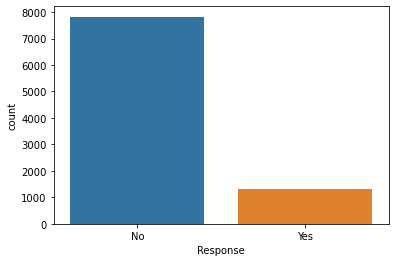

In [168]:
sns.countplot(df.Response)

* A binary value, to check if the response is available or not.
* Most of the customers have a postive response.

In [169]:
# Coverage

In [170]:
df.Coverage.value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

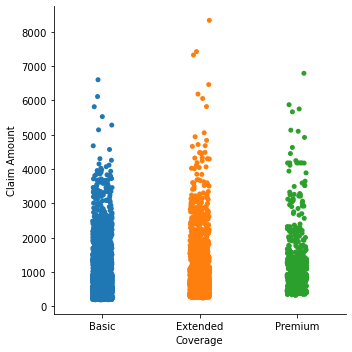

In [171]:
sns.catplot('Coverage','Claim Amount',data=df.dropna())

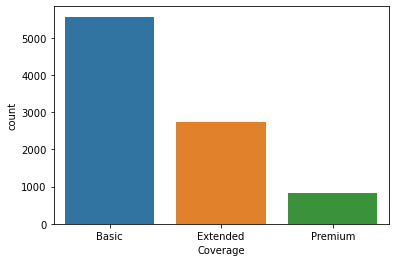

In [172]:
sns.countplot(df.Coverage)

* Type of coverage covered by the insurace policy:
* There are 3 types of coverages available:
    * Basic
    * Extended
    * Premium
* This is an Nominal categorical data type.
* Most of the user opt for the basic type of coverage.

In [173]:
## Education

In [174]:
df.Education.value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

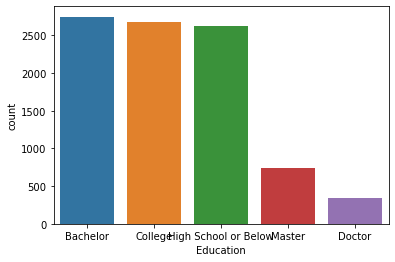

In [175]:
sns.countplot(df.Education,order = df.Education.value_counts().index)

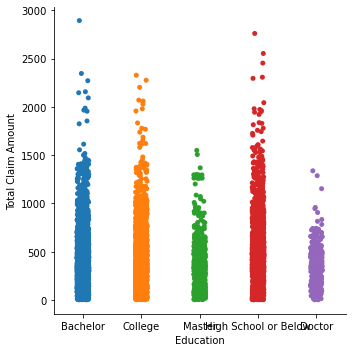

In [176]:
sns.catplot('Education','Total Claim Amount',data=df)

* Qualification of the person who claims for insurance.
* A Categorical value with 5 categories.
* An ordinal datatype.

In [177]:
## Employment Status

In [178]:
df.EmploymentStatus.value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

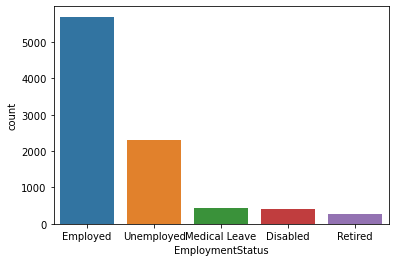

In [179]:
sns.countplot(df.EmploymentStatus,order = df.EmploymentStatus.value_counts().index)

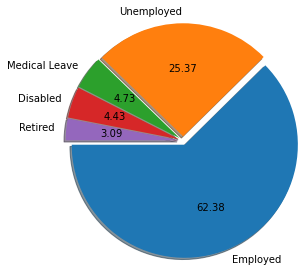

In [180]:
plt.pie(x=df.EmploymentStatus.value_counts(),explode=np.repeat(0.05,repeats=5),autopct='%.2f',labels=df.EmploymentStatus.value_counts().index,radius=1.3,startangle=180,shadow=True,);

* Unemployment rate of 25 percent should be of inconvinience for the automobile insurance company.
* Employed is a categorical type feature.

In [181]:
## Months since policy inception

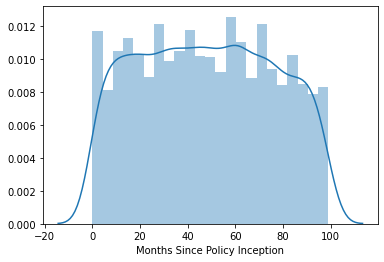

In [182]:
sns.distplot(df['Months Since Policy Inception'])

* This feature as a uniformed distribution and ranges between 0 to 100.

In [183]:
# NUmber of open compliants

* The total number of complaints launched by every person.

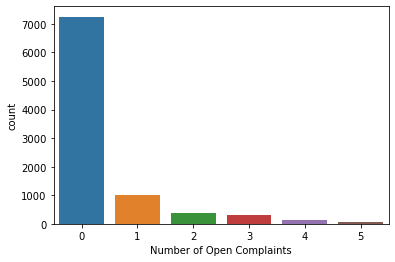

In [184]:
sns.countplot(df['Number of Open Complaints'])

* 5 is the max number of complaints launched by a customer/policy holder.
* most of the customers never files a complaint.

In [185]:
pd.set_option('display.max_columns', None)

In [186]:
df.head()

Customer Country State Code     State  Claim Amount Response  Coverage  \
0  BU79786      US         KS    Kansas    276.351928       No     Basic   
1  QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2  AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3  WW63253      US         MO  Missouri    764.586183       No     Basic   
4  HB64268      US         KS    Kansas    281.369258       No     Basic   

  Education Effective To Date EmploymentStatus Gender  Income Location Code  \
0  Bachelor           2/24/11         Employed      F   56274      Suburban   
1  Bachelor           1/31/11       Unemployed      F       0      Suburban   
2  Bachelor           2/19/11         Employed      F   48767      Suburban   
3  Bachelor           1/20/11       Unemployed      M       0      Suburban   
4  Bachelor            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy  Claim Reason  \
0                   1  Corporate Auto  Corporate L3     Collision   
1                   8   Personal Auto   Personal L3  Scratch/Dent   
2                   2   Personal Auto   Personal L3     Collision   
3                   7  Corporate Auto  Corporate L2     Collision   
4                   1   Personal Auto   Personal L1     Collision   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [187]:
# gender

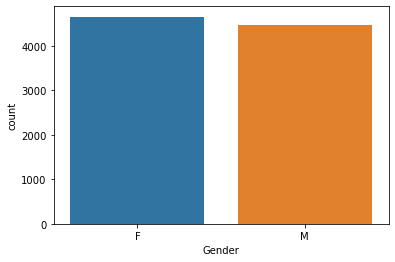

In [188]:
sns.countplot(df.Gender)

* Gender is a pretty balanced dataset.

In [189]:
# income

In [190]:
df.Income

0       56274
1           0
2       48767
3           0
4       43836
        ...  
9129    71941
9130    21604
9131        0
9132    21941
9133        0
Name: Income, Length: 9134, dtype: int64

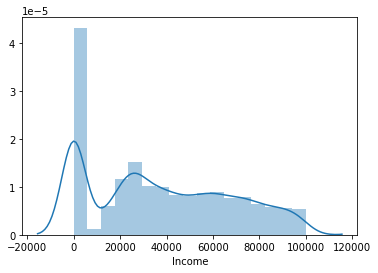

In [191]:
sns.distplot(df.Income)

In [192]:
# helper function
def figure_this_size(x,y):
    return plt.figure(figsize=(x,y))

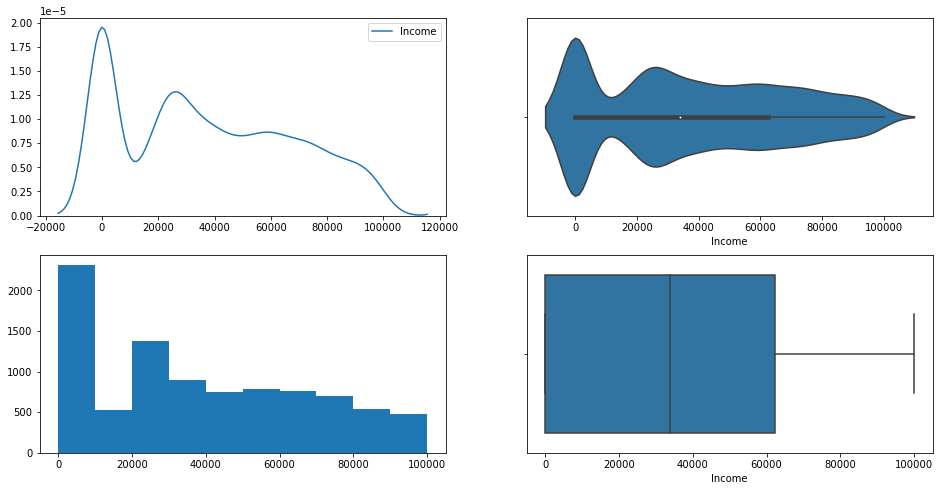

In [193]:
fig = figure_this_size(16,8)

fig.add_subplot(221)
sns.kdeplot(df.Income)

fig.add_subplot(222)
sns.violinplot(df.Income,orient='h')

fig.add_subplot(223)
plt.hist(df.Income)

fig.add_subplot(224)
sns.boxplot(df.Income)

* The feature is the income of the poeron who claims the insurance.
* We can see that most of the values for income is 0, whihc is not possible, thus we infer them as missing values.

In [194]:
df.Income = df.Income.replace(to_replace=0,value=np.nan)

In [195]:
df.isna().sum()

Customer                            0
Country                             0
State Code                          0
State                               0
Claim Amount                        0
Response                            0
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                           2317
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim             0
Months Since Policy Inception       0
Number of Open Complaints           0
Number of Policies                  0
Policy Type                         0
Policy                              0
Claim Reason                        0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                       0
Vehicle Size                        0
dtype: int64

* There are 2317 missing values in the Income feautre.

In [196]:
# Location code

In [197]:
df['Location Code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

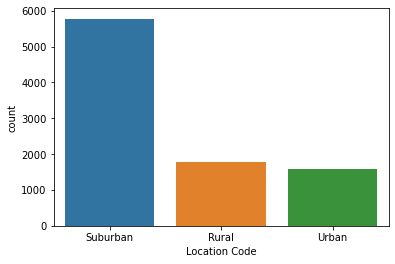

In [198]:
sns.countplot(df['Location Code'])

* Most of the insurance claimers are from the Suburban area.

In [199]:
# Marital Status

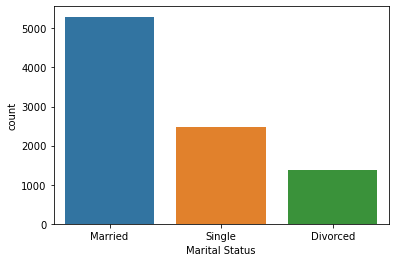

In [200]:
sns.countplot(df['Marital Status'])

* Most of the people are married.

In [201]:
## Monhtly premium auto

* This is the amount the customer pays every month for the insurace.

In [202]:
df['Monthly Premium Auto']

0        69
1        94
2       108
3       106
4        73
       ... 
9129     73
9130     79
9131     85
9132     96
9133     77
Name: Monthly Premium Auto, Length: 9134, dtype: int64

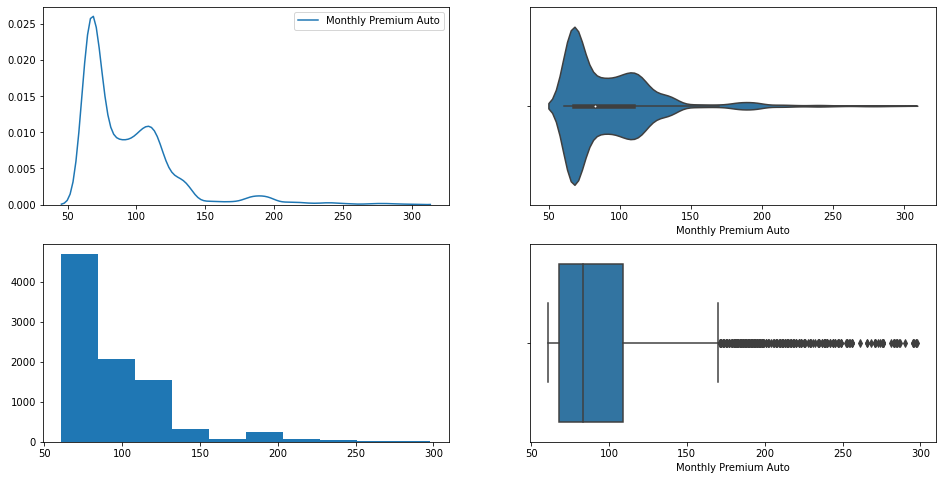

In [203]:
fig = figure_this_size(16,8)

fig.add_subplot(221)
sns.kdeplot(df['Monthly Premium Auto'])

fig.add_subplot(222)
sns.violinplot(df['Monthly Premium Auto'],orient='h')

fig.add_subplot(223)
plt.hist(df['Monthly Premium Auto'])

fig.add_subplot(224)
sns.boxplot(df['Monthly Premium Auto'])

In [204]:
# months since last claim

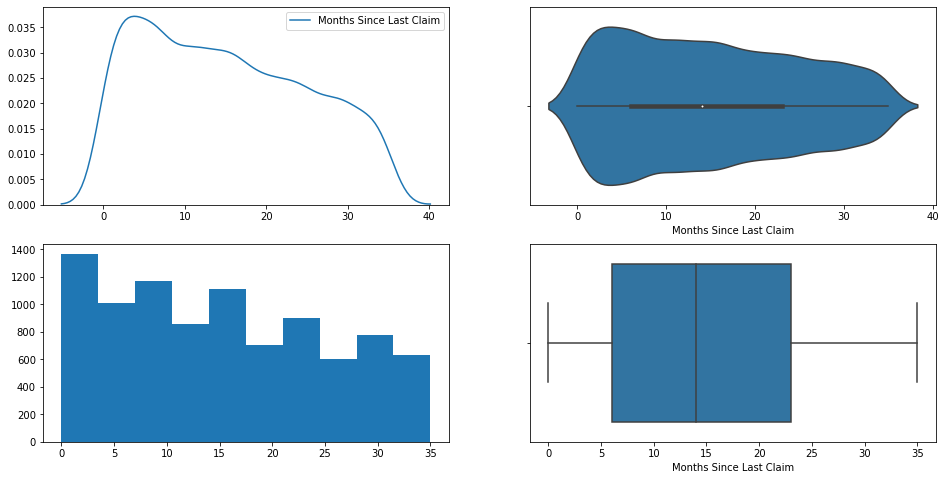

In [205]:
col = df['Months Since Last Claim']

fig = figure_this_size(16,8)

fig.add_subplot(221)
sns.kdeplot(col)

fig.add_subplot(222)
sns.violinplot(col,orient='h')

fig.add_subplot(223)
plt.hist(col)

fig.add_subplot(224)
sns.boxplot(col)

* This feature has a slightly skewed, but normal distribution.

In [206]:
# number of Policies.

* The total number of polices a customer has.

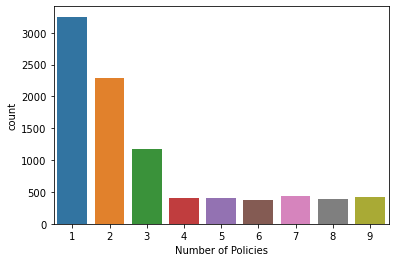

In [207]:
sns.countplot(df['Number of Policies'])

In [208]:
df['Number of Policies'].value_counts()/len(df) * 100

1    35.592293
2    25.114955
3    12.787388
7     4.740530
9     4.554412
4     4.477775
5     4.455879
8     4.204073
6     4.072695
Name: Number of Policies, dtype: float64

* 60 percent of customers have eiher 1 or 2 policies.
* 12 percent of policy holdaers have 3 policies.
* rest have policies more than 3 upto 9.

In [209]:
## Policy type:

In [210]:
df['Policy Type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64

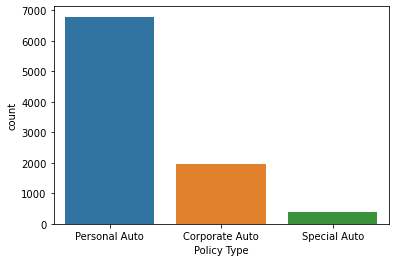

In [211]:
sns.countplot(df['Policy Type'],order = df['Policy Type'].value_counts().index)

* Three types of policies are available for the customers.
* Most of the customers prefer the Personal Auto type Policy.

In [212]:
## Claim Reason

In [213]:
df['Claim Reason'].value_counts()

Collision       3752
Hail            2926
Scratch/Dent    1432
Other           1024
Name: Claim Reason, dtype: int64

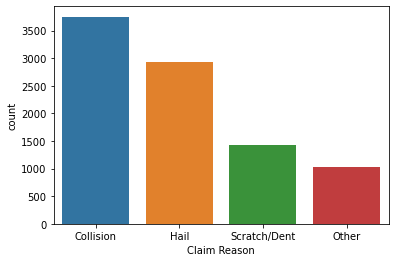

In [214]:
sns.countplot(df['Claim Reason'],order = df['Claim Reason'].value_counts().index)

* This is the reason for which the customer is claiming for insurance money.
* There are 3 specific reason and 1 is the other reason.
* Collision is one of the main reason for an insurance claim.

In [215]:
# Vehicle Class

In [216]:
df['Vehicle Class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

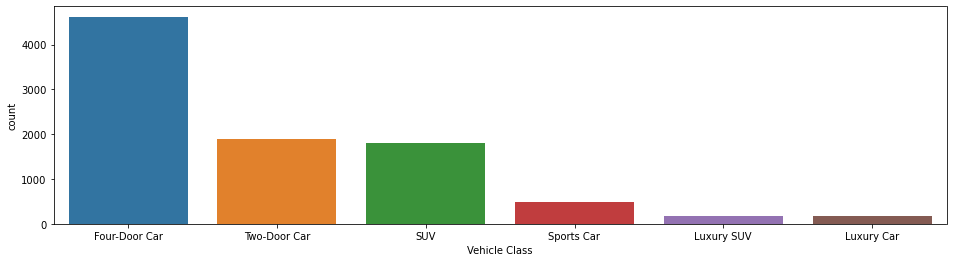

In [217]:
plt.figure(figsize=(16,4))
sns.countplot(df['Vehicle Class'],order=df['Vehicle Class'].value_counts().index)

* There are categories of 6 types of vehicle class.
* Luxury class cars are very low in the set. Most of them are Four-Door Cars.

In [218]:
# Claim amount and total claim amount.

In [219]:
df['Claim Amount']

0        276.351928
1        697.953590
2       1288.743165
3        764.586183
4        281.369258
           ...     
9129    2340.598798
9130     309.651122
9131     816.389043
9132     752.444244
9133     261.183687
Name: Claim Amount, Length: 9134, dtype: float64

In [220]:
df['Total Claim Amount']

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: Total Claim Amount, Length: 9134, dtype: float64

In [221]:
df['Claim Amount'] - df['Total Claim Amount'] 

0       -108.459219
1       -433.511345
2        722.270918
3        234.704839
4        143.238379
           ...     
9129    2142.364034
9130     -69.548878
9131      25.604060
9132      61.244244
9133    -108.416313
Length: 9134, dtype: float64

In [222]:
df['Months Since Policy Inception']

0        5
1       42
2       38
3       65
4       44
        ..
9129    89
9130    28
9131    37
9132     3
9133    90
Name: Months Since Policy Inception, Length: 9134, dtype: int64

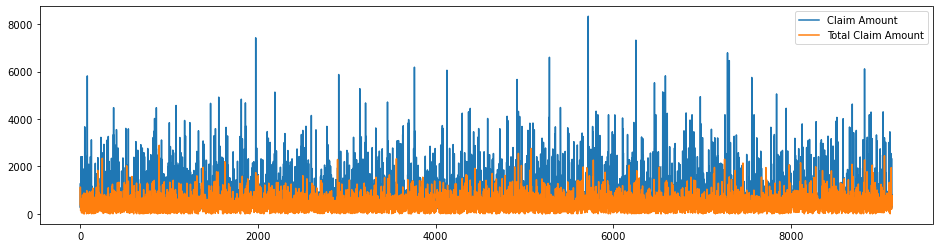

In [223]:
df[['Claim Amount','Total Claim Amount']].plot(figsize=(16,4))

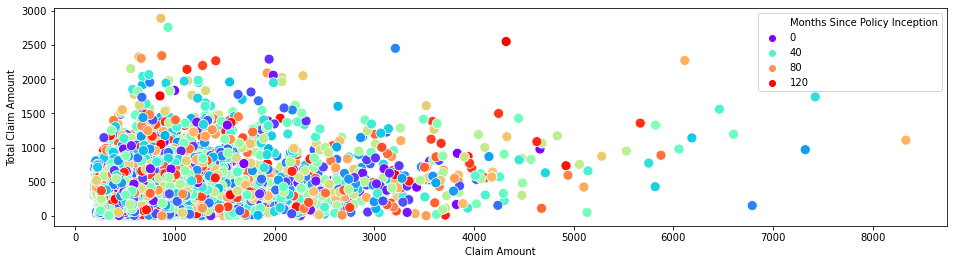

In [224]:
plt.figure(figsize=(16,4))
sns.scatterplot(df['Claim Amount'],df['Total Claim Amount'],hue=df['Months Since Policy Inception'],s=100,palette='rainbow')

In [225]:
df.corr()['Claim Amount']

Claim Amount                     1.000000
Income                           0.002915
Monthly Premium Auto             0.396262
Months Since Last Claim          0.011517
Months Since Policy Inception    0.009418
Number of Open Complaints       -0.036343
Number of Policies               0.021955
Total Claim Amount               0.226451
Name: Claim Amount, dtype: float64

In [226]:
# there is no such significance between Claim anount and total claim amount we could evaluate from the dataset.

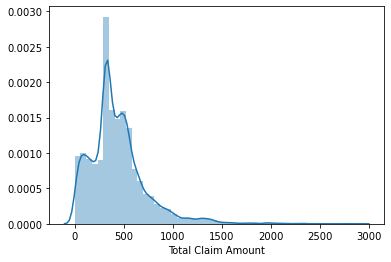

In [227]:
sns.distplot(df['Total Claim Amount'])

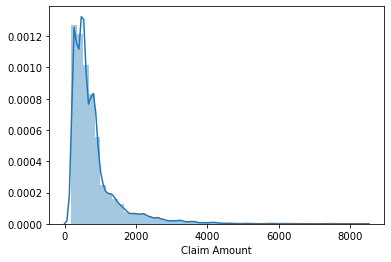

In [228]:
sns.distplot(df['Claim Amount'])

In [229]:
df

Customer Country State Code     State  Claim Amount Response  Coverage  \
0     BU79786      US         KS    Kansas    276.351928       No     Basic   
1     QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2     AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3     WW63253      US         MO  Missouri    764.586183       No     Basic   
4     HB64268      US         KS    Kansas    281.369258       No     Basic   
...       ...     ...        ...       ...           ...      ...       ...   
9129  LA72316      US         MO  Missouri   2340.598798       No     Basic   
9130  PK87824      US         MO  Missouri    309.651122      Yes  Extended   
9131  TD14365      US         MO  Missouri    816.389043       No  Extended   
9132  UP19263      US         MO  Missouri    752.444244       No  Extended   
9133  Y167826      US         MO  Missouri    261.183687       No  Extended   

     Education Effective To Date EmploymentStatus Gender   Income  \
0     Bachelor           2/24/11         Employed      F  56274.0   
1     Bachelor           1/31/11       Unemployed      F      NaN   
2     Bachelor           2/19/11         Employed      F  48767.0   
3     Bachelor           1/20/11       Unemployed      M      NaN   
4     Bachelor            2/3/11         Employed      M  43836.0   
...        ...               ...              ...    ...      ...   
9129  Bachelor           2/10/11         Employed      M  71941.0   
9130   College           2/12/11         Employed      F  21604.0   
9131  Bachelor            2/6/11       Unemployed      M      NaN   
9132   College            2/3/11         Employed      M  21941.0   
9133   College           2/14/11       Unemployed      M      NaN   

     Location Code Marital Status  Monthly Premium Auto  \
0         Suburban        Married                    69   
1         Suburban         Single                    94   
2         Suburban        Married                   108   
3         Suburban        Married                   106   
4            Rural         Single                    73   
...            ...            ...                   ...   
9129         Urban        Married                    73   
9130      Suburban       Divorced                    79   
9131      Suburban         Single                    85   
9132      Suburban        Married                    96   
9133      Suburban         Single                    77   

      Months Since Last Claim  Months Since Policy Inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      Number of Open Complaints  Number of Policies     Policy Type  \
0                             0                   1  Corporate Auto   
1                             0                   8   Personal Auto   
2                             0                   2   Personal Auto   
3                             0                   7  Corporate Auto   
4                             0                   1   Personal Auto   
...                         ...                 ...             ...   
9129                          0                   2   Personal Auto   
9130                          0                   1  Corporate Auto   
9131                          3                   2  Corporate Auto   
9132                          0        

In [230]:
# Multivariate Anaysis

In [231]:
df.head()

Customer Country State Code     State  Claim Amount Response  Coverage  \
0  BU79786      US         KS    Kansas    276.351928       No     Basic   
1  QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2  AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3  WW63253      US         MO  Missouri    764.586183       No     Basic   
4  HB64268      US         KS    Kansas    281.369258       No     Basic   

  Education Effective To Date EmploymentStatus Gender   Income Location Code  \
0  Bachelor           2/24/11         Employed      F  56274.0      Suburban   
1  Bachelor           1/31/11       Unemployed      F      NaN      Suburban   
2  Bachelor           2/19/11         Employed      F  48767.0      Suburban   
3  Bachelor           1/20/11       Unemployed      M      NaN      Suburban   
4  Bachelor            2/3/11         Employed      M  43836.0         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy  Claim Reason  \
0                   1  Corporate Auto  Corporate L3     Collision   
1                   8   Personal Auto   Personal L3  Scratch/Dent   
2                   2   Personal Auto   Personal L3     Collision   
3                   7  Corporate Auto  Corporate L2     Collision   
4                   1   Personal Auto   Personal L1     Collision   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [232]:
# claim amount vs vehicle class

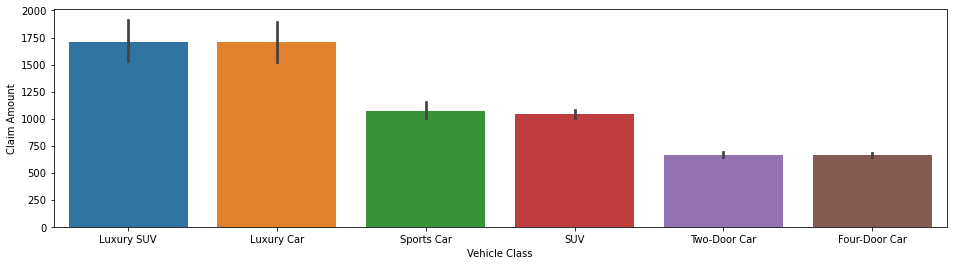

In [233]:
figure_this_size(16,4)
sns.barplot(df['Vehicle Class'],df['Claim Amount'],order=df.groupby('Vehicle Class').mean().sort_values('Claim Amount',ascending=False).index)

* The luxury cars have the highest claim amount compared to rest of the Vehicle Types.

In [234]:
# amount claimed statewise

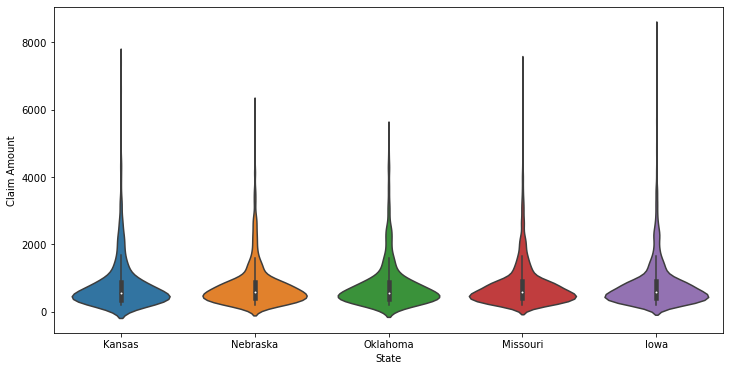

In [235]:
figure_this_size(12,6)
sns.violinplot(df['State'] ,df['Claim Amount'])

In [236]:
# coverage vs claim amount.

<Figure size 864x432 with 0 Axes>

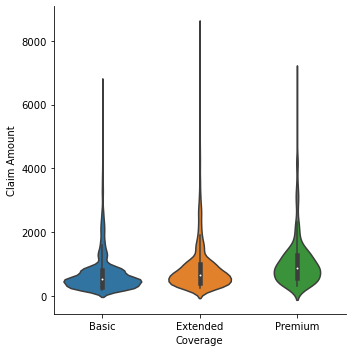

In [237]:
figure_this_size(12,6)

sns.catplot('Coverage','Claim Amount',data=df,kind='violin')

* The extended coverage covers more than the premium, whereas the premium covers more than the basic coverage plans, which is why the premium plans are high and there extra fund in Extended Coverage Plans.

In [238]:
# employment status vs number of policies.

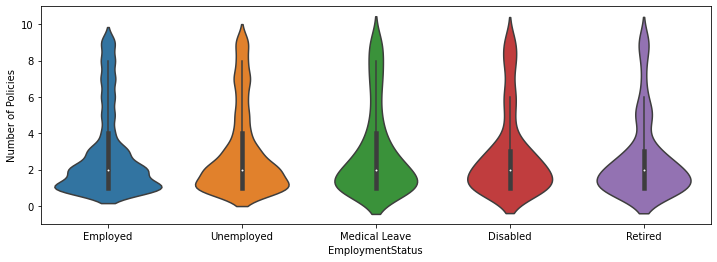

In [239]:
figure_this_size(12,4)
sns.violinplot(df.EmploymentStatus,df['Number of Policies'])

In [240]:
# vehicle size vs claim amounts.

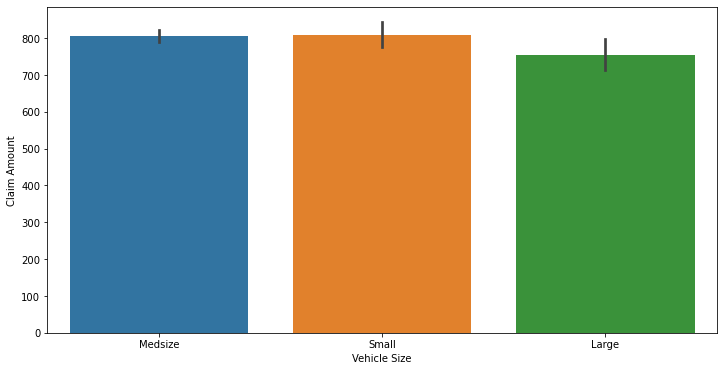

In [241]:
figure_this_size(12,6)

sns.barplot('Vehicle Size','Claim Amount',data=df)

In [242]:
# claim reason vs claim amount

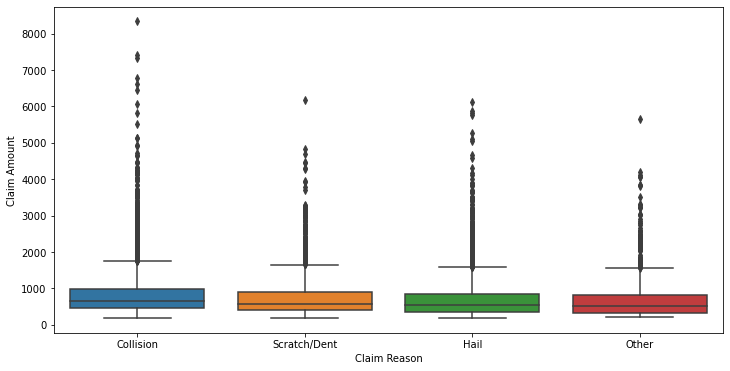

In [243]:
figure_this_size(12,6)

sns.boxplot('Claim Reason','Claim Amount',data=df,order =df.groupby('Claim Reason').mean().sort_values('Claim Amount',ascending=False).index)

* Most of the cases are for collisions for the insurance claim.

In [244]:
# income vs claim amount

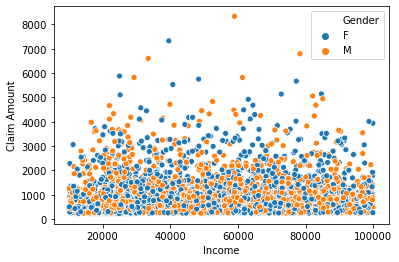

In [245]:
sns.scatterplot(df.Income,df['Claim Amount'],hue=df.Gender)

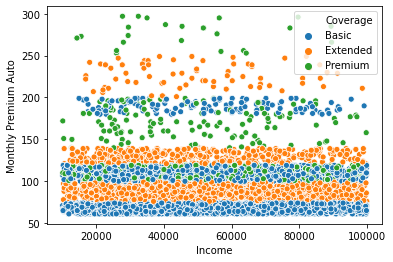

In [246]:
# income with monthly premium
sns.scatterplot(df.Income,df['Monthly Premium Auto'],df.Coverage)

* We can see a pattern between the coverage.
* The montly premium for the Premium Coverage type customers.
* The lowest premium is for the customers with Basic coverage.

In [247]:
# gender with monthly premium

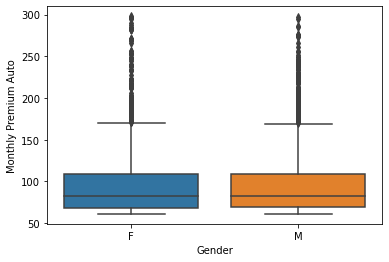

In [248]:
sns.boxplot(df.Gender,df['Monthly Premium Auto'])

* No discrimination!.

In [249]:
# claim amount vs monthly premium auto

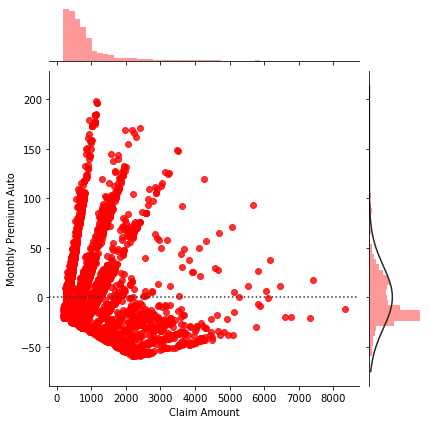

In [250]:
sns.jointplot('Claim Amount','Monthly Premium Auto',data=df,color='r',kind='resid')

## Addressing the missing values

* Let's make a copy of the original dataframe and preprocess that copy for training the model.

In [251]:
df_cleaned = df.copy()

In [252]:
df_cleaned.isna().sum()

Customer                            0
Country                             0
State Code                          0
State                               0
Claim Amount                        0
Response                            0
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                           2317
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim             0
Months Since Policy Inception       0
Number of Open Complaints           0
Number of Policies                  0
Policy Type                         0
Policy                              0
Claim Reason                        0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                       0
Vehicle Size                        0
dtype: int64

In [253]:
df_cleaned.isna().mean()

Customer                         0.000000
Country                          0.000000
State Code                       0.000000
State                            0.000000
Claim Amount                     0.000000
Response                         0.000000
Coverage                         0.000000
Education                        0.000000
Effective To Date                0.000000
EmploymentStatus                 0.000000
Gender                           0.000000
Income                           0.253668
Location Code                    0.000000
Marital Status                   0.000000
Monthly Premium Auto             0.000000
Months Since Last Claim          0.000000
Months Since Policy Inception    0.000000
Number of Open Complaints        0.000000
Number of Policies               0.000000
Policy Type                      0.000000
Policy                           0.000000
Claim Reason                     0.000000
Sales Channel                    0.000000
Total Claim Amount               0

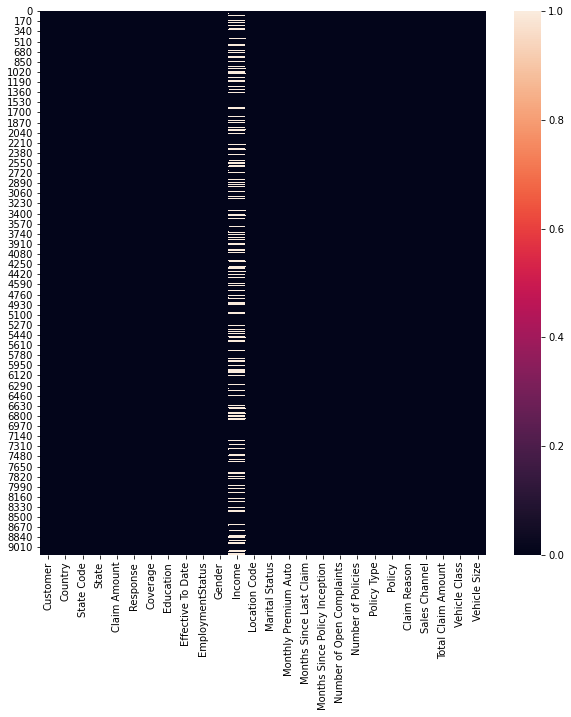

In [254]:
figure_this_size(10,10)
sns.heatmap(df_cleaned.isna())

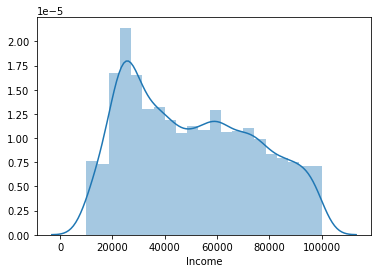

In [255]:
sns.distplot(df_cleaned.Income)

In [256]:
# addressing the missing values

In [257]:
from feature_engine.missing_data_imputers import MeanMedianImputer,RandomSampleImputer,EndTailImputer

In [258]:
imputers = [MeanMedianImputer(variables='Income'),RandomSampleImputer(variables='Income'),EndTailImputer(variables='Income')]

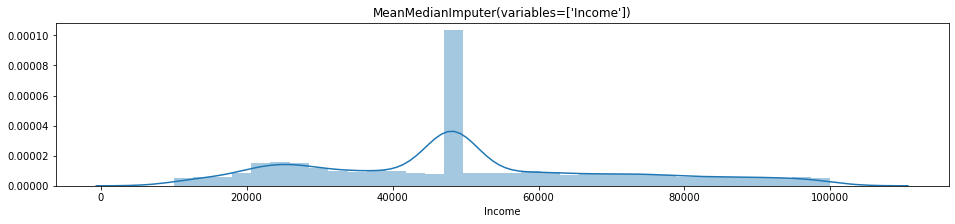

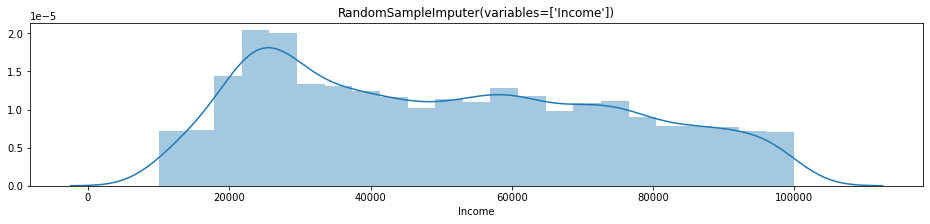

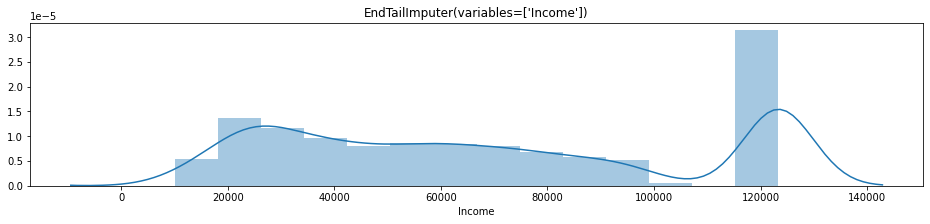

In [259]:
for imputer in imputers:
    figure_this_size(16,3)
    sns.distplot(imputer.fit_transform(df_cleaned)['Income'])
    plt.title(imputer)

* Random Sample inputer is working the best in all of the three.

In [260]:
df_cleaned = RandomSampleImputer(variables='Income').fit_transform(df_cleaned)

In [261]:
df_cleaned.isna().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

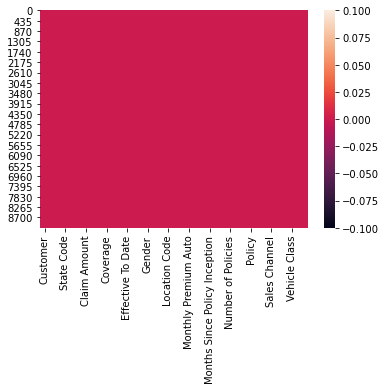

In [262]:
sns.heatmap(df_cleaned.isna())

## Removing the outliers from the dataset.

In [263]:
df_cleaned.head()

Customer Country State Code     State  Claim Amount Response  Coverage  \
0  BU79786      US         KS    Kansas    276.351928       No     Basic   
1  QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2  AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3  WW63253      US         MO  Missouri    764.586183       No     Basic   
4  HB64268      US         KS    Kansas    281.369258       No     Basic   

  Education Effective To Date EmploymentStatus Gender   Income Location Code  \
0  Bachelor           2/24/11         Employed      F  56274.0      Suburban   
1  Bachelor           1/31/11       Unemployed      F  60145.0      Suburban   
2  Bachelor           2/19/11         Employed      F  48767.0      Suburban   
3  Bachelor           1/20/11       Unemployed      M  63891.0      Suburban   
4  Bachelor            2/3/11         Employed      M  43836.0         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy  Claim Reason  \
0                   1  Corporate Auto  Corporate L3     Collision   
1                   8   Personal Auto   Personal L3  Scratch/Dent   
2                   2   Personal Auto   Personal L3     Collision   
3                   7  Corporate Auto  Corporate L2     Collision   
4                   1   Personal Auto   Personal L1     Collision   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [264]:
# removing the redundant columns from the dataset.

In [265]:
df_cleaned.drop(['Customer','Country','State','Effective To Date','Policy Type','Sales Channel'],1,inplace=True)

In [266]:
df_cleaned.head()

State Code  Claim Amount Response  Coverage Education EmploymentStatus  \
0         KS    276.351928       No     Basic  Bachelor         Employed   
1         NE    697.953590       No  Extended  Bachelor       Unemployed   
2         OK   1288.743165       No   Premium  Bachelor         Employed   
3         MO    764.586183       No     Basic  Bachelor       Unemployed   
4         KS    281.369258       No     Basic  Bachelor         Employed   

  Gender   Income Location Code Marital Status  Monthly Premium Auto  \
0      F  56274.0      Suburban        Married                    69   
1      F  60145.0      Suburban         Single                    94   
2      F  48767.0      Suburban        Married                   108   
3      M  63891.0      Suburban        Married                   106   
4      M  43836.0         Rural         Single                    73   

   Months Since Last Claim  Months Since Policy Inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   Number of Open Complaints  Number of Policies        Policy  Claim Reason  \
0                          0                   1  Corporate L3     Collision   
1                          0                   8   Personal L3  Scratch/Dent   
2                          0                   2   Personal L3     Collision   
3                          0                   7  Corporate L2     Collision   
4                          0                   1   Personal L1     Collision   

   Total Claim Amount  Vehicle Class Vehicle Size  
0          384.811147   Two-Door Car      Medsize  
1         1131.464935  Four-Door Car      Medsize  
2          566.472247   Two-Door Car      Medsize  
3          529.881344            SUV      Medsize  
4          138.130879  Four-Door Car      Medsize

In [267]:
# serpeating the numberical column and the categorical column
from feature_engine.missing_data_imputers import _find_categorical_variables,_find_numerical_variables

In [268]:
num_var = _find_numerical_variables(df_cleaned)
car_var = _find_categorical_variables(df_cleaned)

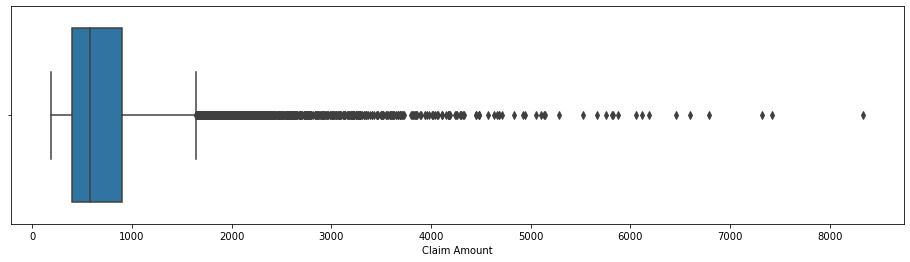

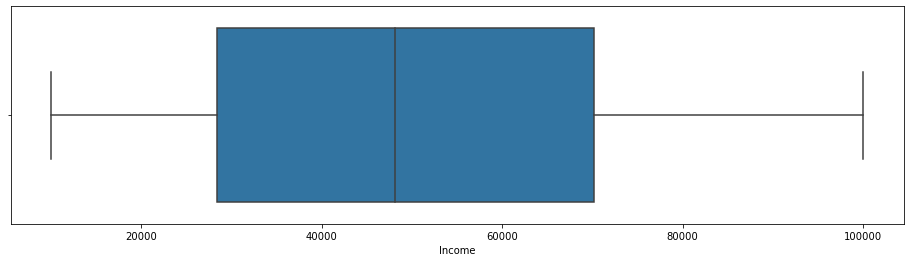

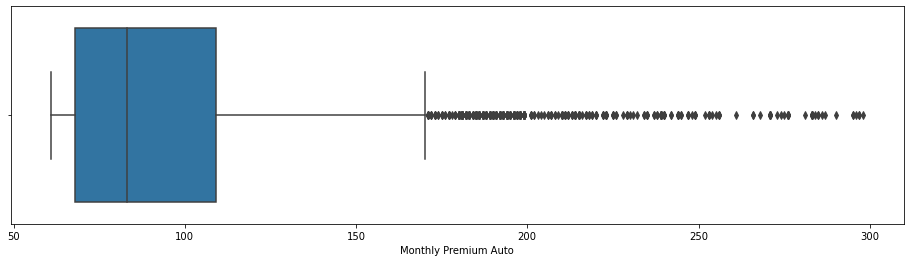

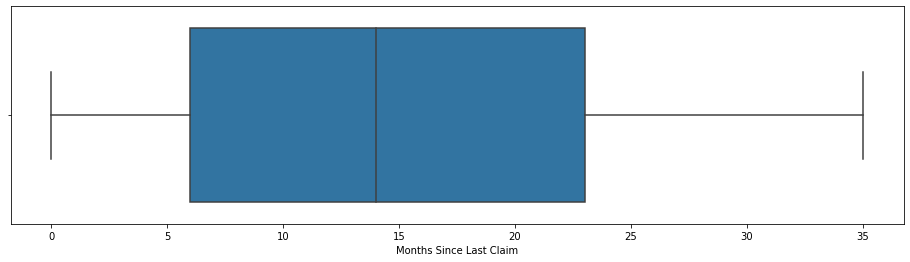

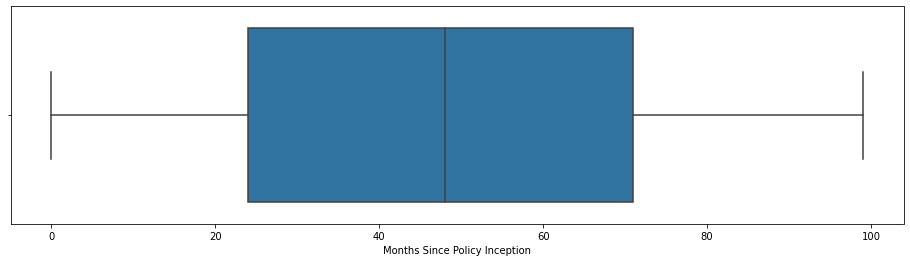

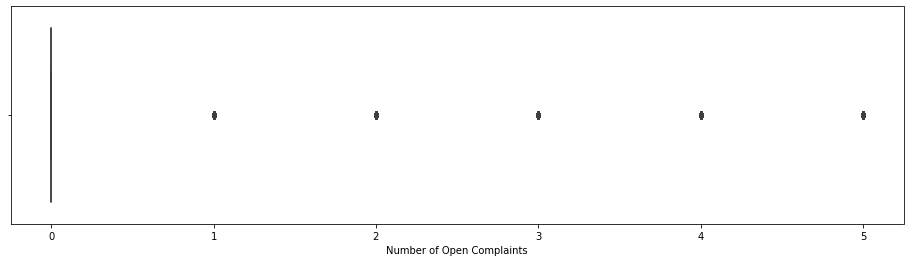

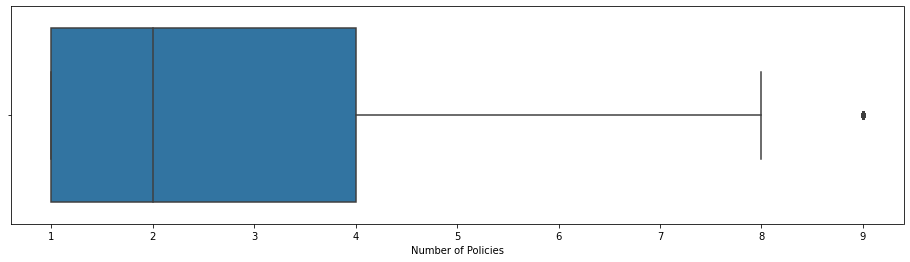

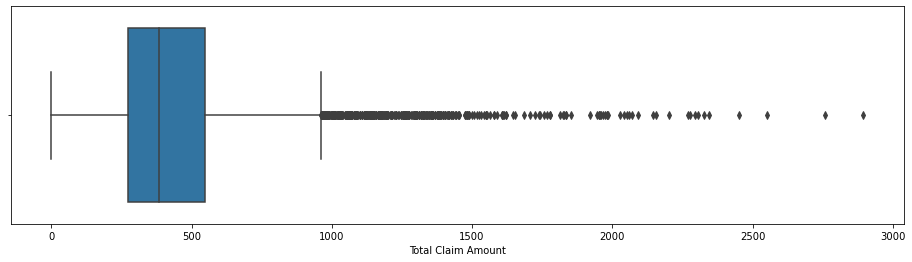

In [269]:
# plotting the outliers
for col in num_var:
    figure_this_size(16,4)
    sns.boxplot(df[col])

In [270]:
# addressing the outliers using the z score

In [271]:
z_scores = stats.zscore(df_cleaned[num_var])

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df_cleaned = df_cleaned[filtered_entries]

In [272]:
len(df)

9134

In [273]:
len(df_cleaned)

8470

In [274]:
9134 - 8470 

664

* There were 664 outliers in the dataset.

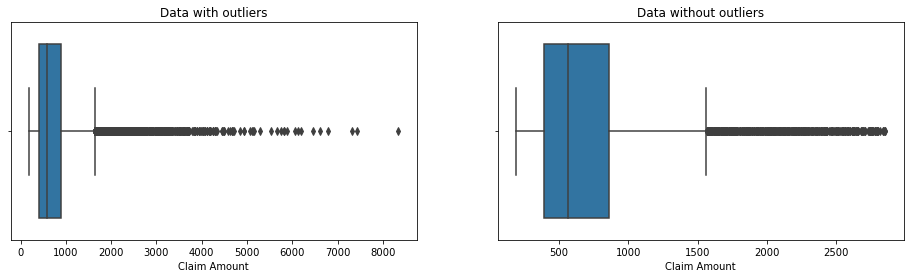

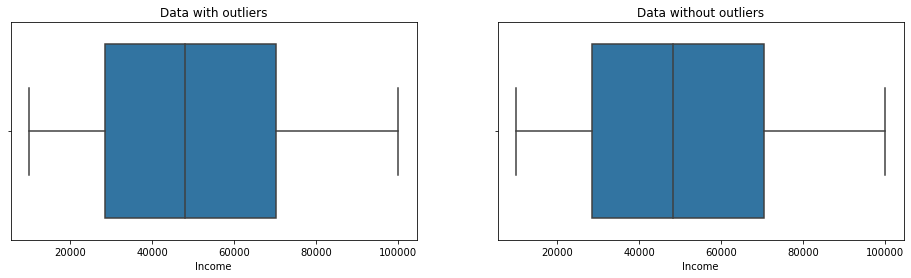

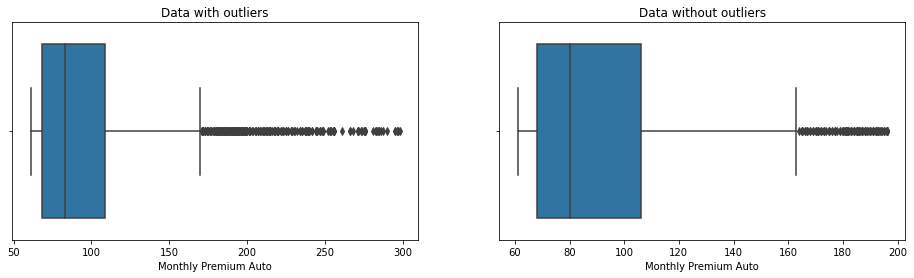

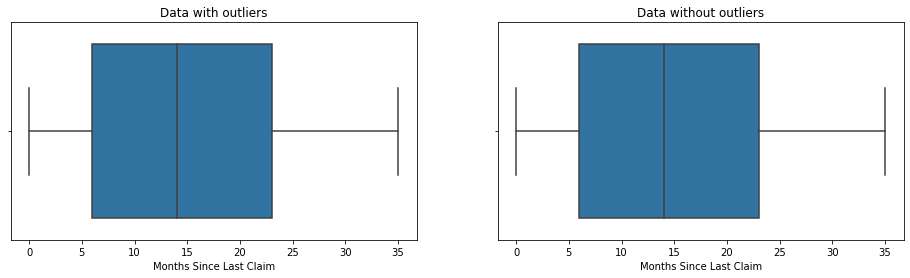

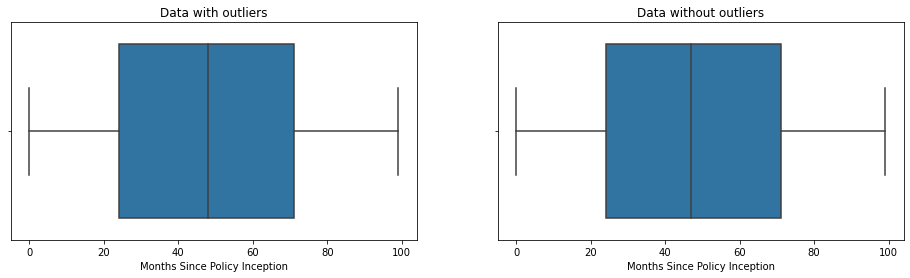

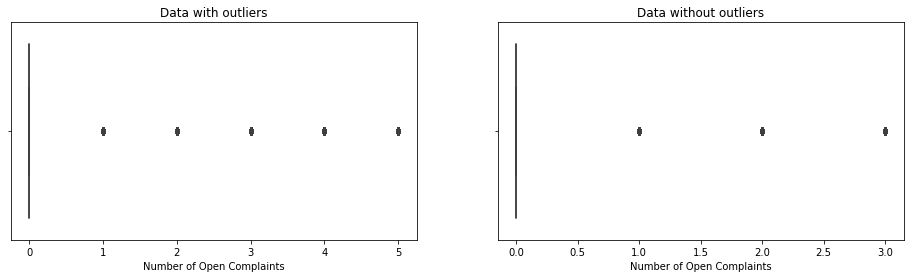

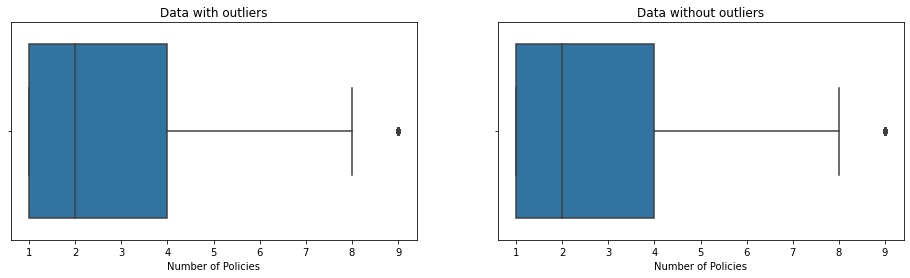

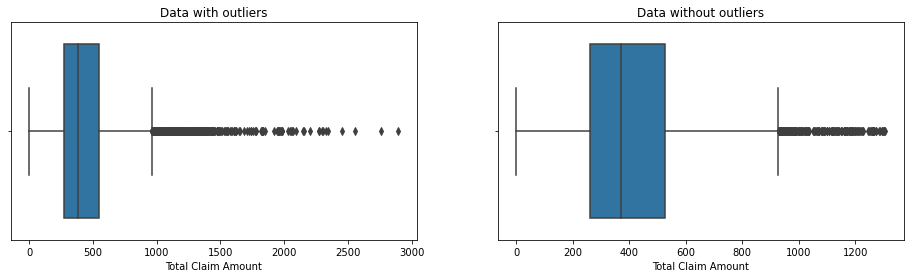

In [275]:
# before and after removing the outliers
for col in num_var:
    fig = figure_this_size(16,4)
    
    fig.add_subplot(121)
    sns.boxplot(df[col])
    plt.title('Data with outliers')
    
    fig.add_subplot(122)
    sns.boxplot(df_cleaned[col])
    plt.title('Data without outliers')

## Skewness of the data

In [276]:
df

Customer Country State Code     State  Claim Amount Response  Coverage  \
0     BU79786      US         KS    Kansas    276.351928       No     Basic   
1     QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2     AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3     WW63253      US         MO  Missouri    764.586183       No     Basic   
4     HB64268      US         KS    Kansas    281.369258       No     Basic   
...       ...     ...        ...       ...           ...      ...       ...   
9129  LA72316      US         MO  Missouri   2340.598798       No     Basic   
9130  PK87824      US         MO  Missouri    309.651122      Yes  Extended   
9131  TD14365      US         MO  Missouri    816.389043       No  Extended   
9132  UP19263      US         MO  Missouri    752.444244       No  Extended   
9133  Y167826      US         MO  Missouri    261.183687       No  Extended   

     Education Effective To Date EmploymentStatus Gender   Income  \
0     Bachelor           2/24/11         Employed      F  56274.0   
1     Bachelor           1/31/11       Unemployed      F      NaN   
2     Bachelor           2/19/11         Employed      F  48767.0   
3     Bachelor           1/20/11       Unemployed      M      NaN   
4     Bachelor            2/3/11         Employed      M  43836.0   
...        ...               ...              ...    ...      ...   
9129  Bachelor           2/10/11         Employed      M  71941.0   
9130   College           2/12/11         Employed      F  21604.0   
9131  Bachelor            2/6/11       Unemployed      M      NaN   
9132   College            2/3/11         Employed      M  21941.0   
9133   College           2/14/11       Unemployed      M      NaN   

     Location Code Marital Status  Monthly Premium Auto  \
0         Suburban        Married                    69   
1         Suburban         Single                    94   
2         Suburban        Married                   108   
3         Suburban        Married                   106   
4            Rural         Single                    73   
...            ...            ...                   ...   
9129         Urban        Married                    73   
9130      Suburban       Divorced                    79   
9131      Suburban         Single                    85   
9132      Suburban        Married                    96   
9133      Suburban         Single                    77   

      Months Since Last Claim  Months Since Policy Inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      Number of Open Complaints  Number of Policies     Policy Type  \
0                             0                   1  Corporate Auto   
1                             0                   8   Personal Auto   
2                             0                   2   Personal Auto   
3                             0                   7  Corporate Auto   
4                             0                   1   Personal Auto   
...                         ...                 ...             ...   
9129                          0                   2   Personal Auto   
9130                          0                   1  Corporate Auto   
9131                          3                   2  Corporate Auto   
9132                          0        

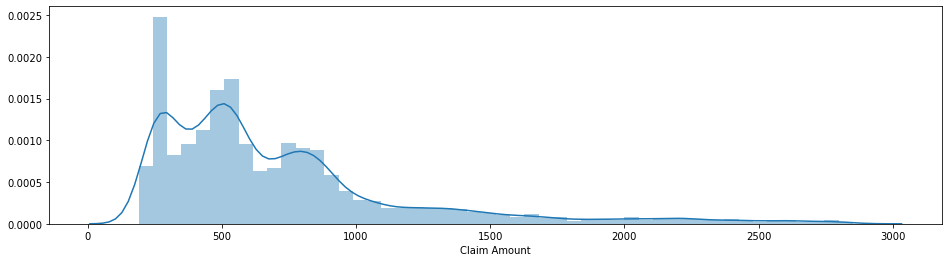

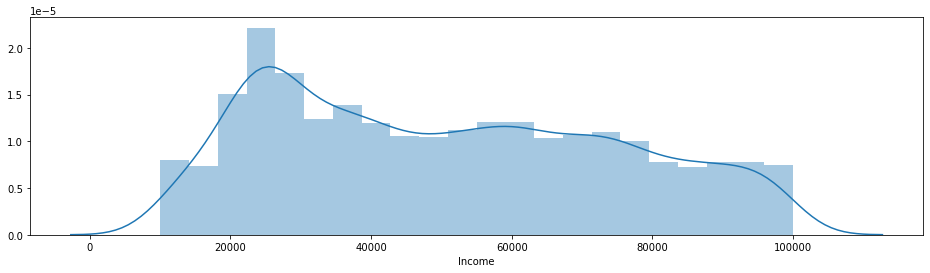

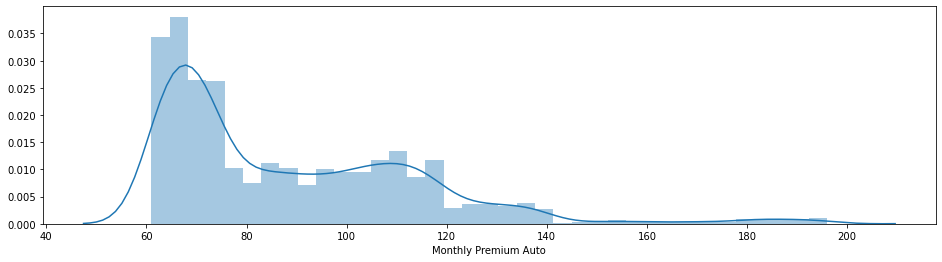

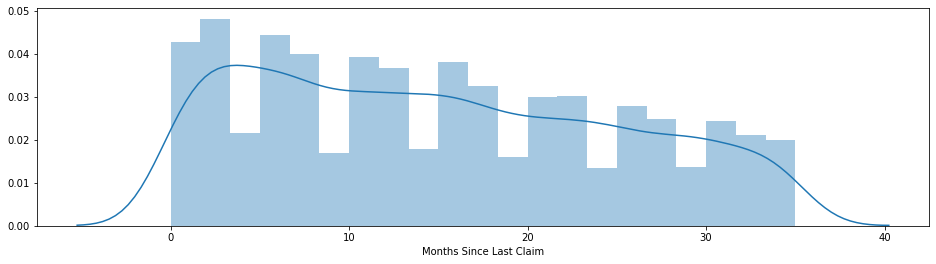

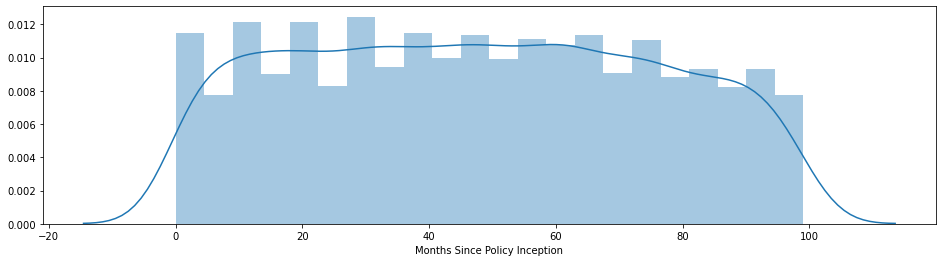

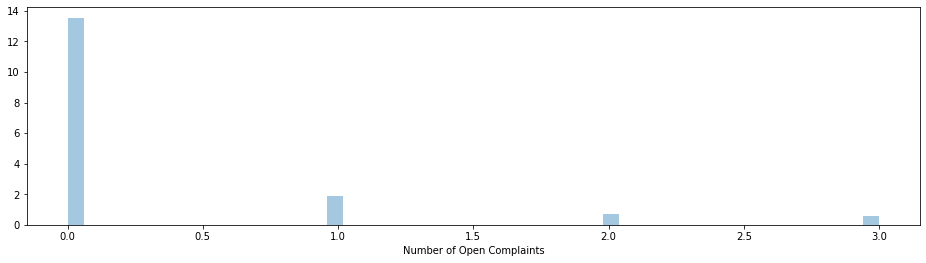

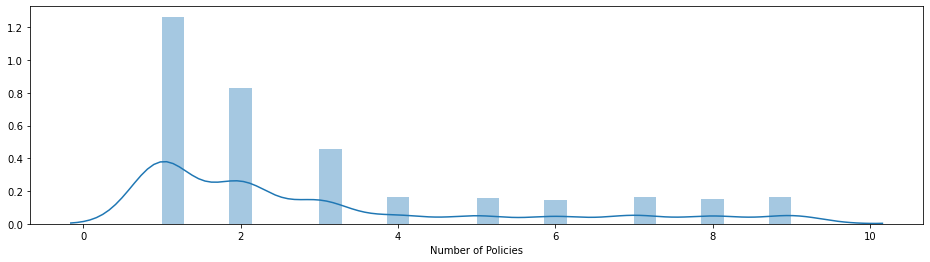

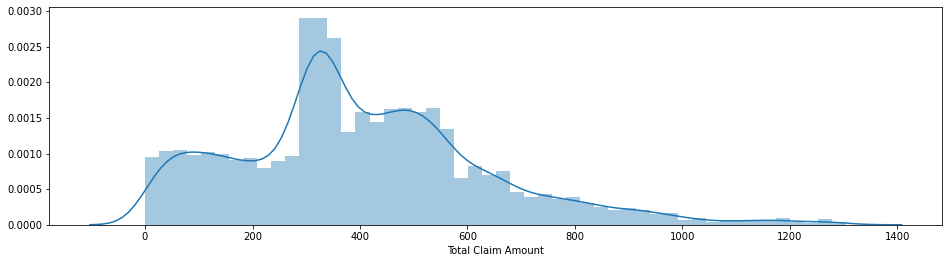

In [277]:
for col in num_var:
    figure_this_size(16,4)
    sns.distplot(df_cleaned[col])

skew_stats

In [278]:
df_cleaned[num_var].skew()

Claim Amount                     1.848796
Income                           0.281855
Monthly Premium Auto             1.330466
Months Since Last Claim          0.283606
Months Since Policy Inception    0.049470
Number of Open Complaints        2.574570
Number of Policies               1.226531
Total Claim Amount               0.709643
dtype: float64

In [279]:
# addressing the skewness using skew transformation

In [280]:
#try1 : log transforamtion

np.log1p(df_cleaned[num_var]).skew()

Claim Amount                     0.359738
Income                          -0.462223
Monthly Premium Auto             0.695535
Months Since Last Claim         -0.998578
Months Since Policy Inception   -1.518474
Number of Open Complaints        2.028948
Number of Policies               0.638404
Total Claim Amount              -1.930304
dtype: float64

In [281]:
#try2 : sqrt trandfomation
np.sqrt(df_cleaned[num_var]).skew()

Claim Amount                     1.069550
Income                          -0.055243
Monthly Premium Auto             0.973258
Months Since Last Claim         -0.436052
Months Since Policy Inception   -0.586532
Number of Open Complaints        1.871949
Number of Policies               0.834717
Total Claim Amount              -0.336015
dtype: float64

In [282]:
# try3 : cbrt transformation.
np.cbrt(df_cleaned[num_var]).skew()

Claim Amount                     0.821241
Income                          -0.181518
Monthly Premium Auto             0.871489
Months Since Last Claim         -1.026595
Months Since Policy Inception   -1.022100
Number of Open Complaints        1.721419
Number of Policies               0.695791
Total Claim Amount              -0.773467
dtype: float64

In [283]:
# we will use the sqrt transforation.
df_cleaned[num_var] = np.sqrt(df_cleaned[num_var])

In [284]:
df_cleaned.skew()

Claim Amount                     1.069550
Income                          -0.055243
Monthly Premium Auto             0.973258
Months Since Last Claim         -0.436052
Months Since Policy Inception   -0.586532
Number of Open Complaints        1.871949
Number of Policies               0.834717
Total Claim Amount              -0.336015
dtype: float64

In [285]:
# let's try stripping the last 1 percentile of the feature claim amount.

In [286]:
q = df_cleaned['Claim Amount'].quantile(0.99)

In [287]:
q

50.462679863439675

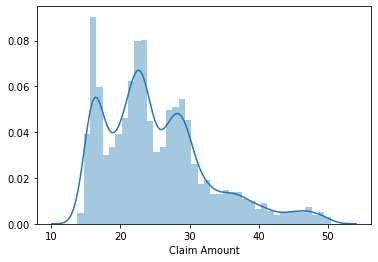

In [288]:
sns.distplot(df_cleaned[df_cleaned['Claim Amount'] < q]['Claim Amount'])

In [289]:
# this looks much better than the original one.

In [290]:
df_cleaned = df_cleaned[df_cleaned['Claim Amount'] < q]

In [291]:
# revised sqewness

In [292]:
df_cleaned.skew()

Claim Amount                     0.950084
Income                          -0.055464
Monthly Premium Auto             0.984022
Months Since Last Claim         -0.437227
Months Since Policy Inception   -0.586847
Number of Open Complaints        1.872157
Number of Policies               0.822638
Total Claim Amount              -0.333336
dtype: float64

* The standard valid skew is between -1 to +1.

* The number of policie is a real value but yet it acts like a categorical one in the dataset, thus its skew is valid even if is exceeding the valid boundary.

In [293]:
df_cleaned

State Code  Claim Amount Response  Coverage Education EmploymentStatus  \
0            KS     16.623836       No     Basic  Bachelor         Employed   
1            NE     26.418811       No  Extended  Bachelor       Unemployed   
2            OK     35.899069       No   Premium  Bachelor         Employed   
3            MO     27.651152       No     Basic  Bachelor       Unemployed   
4            KS     16.774065       No     Basic  Bachelor         Employed   
...         ...           ...      ...       ...       ...              ...   
9129         MO     48.379735       No     Basic  Bachelor         Employed   
9130         MO     17.596907      Yes  Extended   College         Employed   
9131         MO     28.572523       No  Extended  Bachelor       Unemployed   
9132         MO     27.430717       No  Extended   College         Employed   
9133         MO     16.161178       No  Extended   College       Unemployed   

     Gender      Income Location Code Marital Status  Monthly Premium Auto  \
0         F  237.221416      Suburban        Married              8.306624   
1         F  245.244776      Suburban         Single              9.695360   
2         F  220.832516      Suburban        Married             10.392305   
3         M  252.766691      Suburban        Married             10.295630   
4         M  209.370485         Rural         Single              8.544004   
...     ...         ...           ...            ...                   ...   
9129      M  268.218195         Urban        Married              8.544004   
9130      F  146.982992      Suburban       Divorced              8.888194   
9131      M  119.054609      Suburban         Single              9.219544   
9132      M  148.124947      Suburban        Married              9.797959   
9133      M  309.111630      Suburban         Single              8.774964   

      Months Since Last Claim  Months Since Policy Inception  \
0                    5.656854                       2.236068   
1                    3.605551                       6.480741   
2                    4.242641                       6.164414   
3                    4.242641                       8.062258   
4                    3.464102                       6.633250   
...                       ...                            ...   
9129                 4.242641                       9.433981   
9130                 3.741657                       5.291503   
9131                 3.000000                       6.082763   
9132                 5.830952                       1.732051   
9133                 1.732051                       9.486833   

      Number of Open Complaints  Number of Policies        Policy  \
0                      0.000000            1.000000  Corporate L3   
1                      0.000000            2.828427   Personal L3   
2                      0.000000            1.414214   Personal L3   
3                      0.000000            2.645751  Corporate L2   
4                      0.000000            1.000000   Personal L1   
...                         ...                 ...           ...   
9129                   0.000000            1.414214   Personal L1   
9130                   0.000000            1.000000  Corporate L3   
9131                   1.732051            1.414214  Corporate L2   
9132                   0.000000            1.732051   Personal L2   
9133                   0.000000            1.000000  Corporate L3   

      Claim Reason  Total Claim Amount  Vehicle Class Vehicle Size  
0        Collision           19.616604   Two-Door Car      Medsize  
1     Scratch/Dent           33.637255  Four-Door Car      Medsize  
2        Collision           23.800677   Two-Door Car      Medsize  
3        Collision           23.019152            SUV      Medsize  
4        Collision           11.752909  Four-Door Car      Medsize  
...            ...                 ...            ...          ...  
9129          Hail           14.079587

## Encoding the categorical variables.

In [294]:
cat_var = _find_categorical_variables(df_cleaned)

In [295]:
cat_var

['State Code',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy',
 'Claim Reason',
 'Vehicle Class',
 'Vehicle Size']

In [296]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [297]:
enc = OneHotCategoricalEncoder(variables=cat_var,drop_last=True)

In [298]:
df_cleaned = enc.fit_transform(df_cleaned)

In [299]:
df_cleaned.head()

Claim Amount      Income  Monthly Premium Auto  Months Since Last Claim  \
0     16.623836  237.221416              8.306624                 5.656854   
1     26.418811  245.244776              9.695360                 3.605551   
2     35.899069  220.832516             10.392305                 4.242641   
3     27.651152  252.766691             10.295630                 4.242641   
4     16.774065  209.370485              8.544004                 3.464102   

   Months Since Policy Inception  Number of Open Complaints  \
0                       2.236068                        0.0   
1                       6.480741                        0.0   
2                       6.164414                        0.0   
3                       8.062258                        0.0   
4                       6.633250                        0.0   

   Number of Policies  Total Claim Amount  State Code_KS  State Code_NE  \
0            1.000000           19.616604              1              0   
1            2.828427           33.637255              0              1   
2            1.414214           23.800677              0              0   
3            2.645751           23.019152              0              0   
4            1.000000           11.752909              1              0   

   State Code_OK  State Code_MO  Response_No  Coverage_Basic  \
0              0              0            1               1   
1              0              0            1               0   
2              1              0            1               0   
3              0              1            1               1   
4              0              0            1               1   

   Coverage_Extended  Education_Bachelor  Education_College  Education_Master  \
0                  0                   1                  0                 0   
1                  1                   1                  0                 0   
2                  0                   1                  0                 0   
3                  0                   1                  0                 0   
4                  0                   1                  0                 0   

   Education_High School or Below  EmploymentStatus_Employed  \
0                               0                          1   
1                               0                          0   
2                               0                          1   
3                               0                          0   
4                               0                          1   

   EmploymentStatus_Unemployed  EmploymentStatus_Medical Leave  \
0                            0                               0   
1                            1                               0   
2                            0                               0   
3                            1                               0   
4                            0                               0   

   EmploymentStatus_Disabled  Gender_F  Location Code_Suburban  \
0                          0         1                       1   
1                          0         1                       1   
2                          0         1                       1   
3                          0         0                       1   
4                          0         0                       0   

   Location Code_Rural  Marital Status_Married  Marital Status_Single  \
0                    0                       1                      0   
1                    0                       0                      1   
2                    0                       1                      0   
3                    0                       1                      0   
4                    1                       0                      1   

   Policy_Corporate L3  Policy_Personal L3  Policy_Corporate L2  \
0                    1                   0                    0   
1                    0                   1                    0   
2            

## X and y split

In [300]:
X = df_cleaned.drop('Claim Amount',1)
y = df_cleaned['Claim Amount']

In [302]:
## Train test split
from sklearn.model_selection import train_test_split

In [303]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [304]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5617, 45), (5617,), (2767, 45), (2767,))

## Building up the model.

In [305]:
# import training dependencies
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [306]:
# import the evaluation metrics dependenices
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [307]:
# helper function
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    print('MSE:',mean_squared_error(y_test,y_preds))
    print('R2_Score',r2_score(y_test,y_preds))  

In [308]:
# try1: Linear Regression
train_n_ret_scores(LinearRegression())

MSE: 45.830640416673226
R2_Score 0.19892356719789217


In [309]:
# try2: Ridge Regression
train_n_ret_scores(Ridge())

MSE: 45.82765963185711
R2_Score 0.19897566850927983


In [310]:
# try3: Lasso Regression
train_n_ret_scores(Lasso(alpha=0.00003))

MSE: 45.829828725545624
R2_Score 0.19893775479438058


In [311]:
# ElasticNet
train_n_ret_scores(ElasticNet(alpha=0.0001))

MSE: 45.828416666021894
R2_Score 0.19896243626502763


In [312]:
# try4: SVR
train_n_ret_scores(SVR())

MSE: 58.34734444963731
R2_Score -0.01985663150775041


In [313]:
# try5: Decision Trees
train_n_ret_scores(DecisionTreeRegressor(criterion='mse'))

MSE: 16.36713561422545
R2_Score 0.7139178834546211


In [314]:
# try6: Random Forest
train_n_ret_scores(RandomForestRegressor())

MSE: 7.574957458047669
R2_Score 0.8675968774611982


In [315]:
# try7: Gradient Boosting
train_n_ret_scores(GradientBoostingRegressor())

MSE: 8.027162158995907
R2_Score 0.8596927651590675


In [316]:
# try8: Adaboost

train_n_ret_scores(AdaBoostRegressor())

MSE: 11.467123756251675
R2_Score 0.7995654760735896


In [317]:
# try9: Adaboost with DC

train_n_ret_scores(AdaBoostRegressor(base_estimator=DecisionTreeRegressor()))

MSE: 8.904124442270193
R2_Score 0.8443642903395931


In [318]:
#let's create the models dataframe
models = [LinearRegression(),Ridge(alpha=0.001),Lasso(alpha=0.0003),ElasticNet(alpha=0.0001),SVR(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(base_estimator=LinearRegression())]
model_names = 'Linear Ridge Lasso ElasticNet SVR Descision_Tree Random_Forest Gradient_Boost Ada_Boost'.split()
models_df = pd.DataFrame(columns=['Model','MSE','R2','meanCV'])
for model,model_names in zip(models,model_names):
    print(model)
    
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    mse = mean_squared_error(y_test,y_preds)
    r2 = r2_score(y_test,y_preds)
    avgCV = np.mean(cross_val_score(model,X,y,scoring='r2'))
    
    
    models_df = models_df.append({'Model':model_names,'MSE':mse,'R2':r2,'meanCV':avgCV},ignore_index=True)


LinearRegression()
Ridge(alpha=0.001)
Lasso(alpha=0.0003)
ElasticNet(alpha=0.0001)
SVR()
DecisionTreeRegressor()
RandomForestRegressor()
GradientBoostingRegressor()
AdaBoostRegressor(base_estimator=LinearRegression())


In [319]:
models_df

Model        MSE        R2    meanCV
0          Linear  45.830640  0.198924  0.192854
1           Ridge  45.830637  0.198924  0.192855
2           Lasso  45.822166  0.199072  0.193003
3      ElasticNet  45.828417  0.198962  0.192909
4             SVR  58.347344 -0.019857 -0.013024
5  Descision_Tree  16.087159  0.718812  0.735181
6   Random_Forest   7.635195  0.866544  0.863393
7  Gradient_Boost   8.027373  0.859689  0.855522
8       Ada_Boost  49.787639  0.129759  0.116843

* Random forest gives us the best cross_val_score,so lets continue with Random Forest as the best model.

In [320]:
best_model = RandomForestRegressor()

In [321]:
best_model.fit(X_train,y_train)

RandomForestRegressor()

In [322]:
best_model.feature_importances_

array([2.24813450e-02, 1.75217415e-01, 1.65807322e-02, 1.87113641e-02,
       4.17222042e-03, 6.84534084e-01, 1.88091714e-02, 1.21058206e-03,
       1.80319065e-03, 2.03923130e-03, 1.80307797e-03, 2.44244680e-03,
       1.48828148e-03, 1.90458529e-03, 1.98763698e-03, 2.17672154e-03,
       1.43060846e-03, 2.46283042e-03, 4.64700249e-03, 2.78587336e-03,
       1.98222430e-03, 4.90429420e-04, 2.91974814e-03, 8.89572660e-04,
       5.53668767e-04, 2.17360234e-03, 2.04099891e-03, 1.15473214e-03,
       1.65216071e-03, 9.07010126e-04, 1.25526989e-03, 5.23424885e-04,
       7.27459529e-04, 1.73930038e-03, 5.87873422e-04, 1.82028399e-03,
       1.56068556e-03, 2.00038510e-03, 1.43268971e-03, 1.26453379e-03,
       2.46448796e-04, 3.06048266e-04, 2.38738958e-06, 1.61400596e-03,
       1.46665510e-03])

In [323]:
best_model.score(X_test,y_test)

0.8670149160554426

In [324]:
# let's plot the feature impiortance
feat_imp = pd.DataFrame(zip(X_train.columns,best_model.feature_importances_),columns=['Feature','Importance_Value'])

In [325]:
# let's look at top 10 features
feat_imp[:10]

Feature  Importance_Value
0                         Income          0.022481
1           Monthly Premium Auto          0.175217
2        Months Since Last Claim          0.016581
3  Months Since Policy Inception          0.018711
4      Number of Open Complaints          0.004172
5             Number of Policies          0.684534
6             Total Claim Amount          0.018809
7                  State Code_KS          0.001211
8                  State Code_NE          0.001803
9                  State Code_OK          0.002039

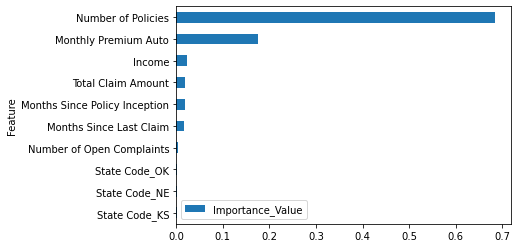

In [326]:
feat_imp[:10].sort_values('Importance_Value').plot.barh('Feature')

In [327]:
# Saving the best model.
import joblib
joblib.dump(best_model,'Insurance_Claim_amount.pkl')

['Insurance_Claim_amount.pkl']

# Part 2

In [396]:
df = pd.read_csv('Automobile_insurance_fraud.csv')

In [397]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [398]:
# shape of the dataframe
df.shape

(1000, 40)

In [399]:
# info on this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [400]:
# head of the dataset
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [401]:
# sample of the dataset
df.sample(5)

months_as_customer  age  policy_number policy_bind_date policy_state  \
994                 141   30         681486       24-03-2007           IN   
73                  215   37         761189       28-12-2002           IN   
814                  57   25         907113       20-01-1996           IL   
533                 339   49         840806       14-02-1994           IN   
289                  40   39         448642       28-03-2001           IN   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
994   500/1000               1000                1347.04               0   
73     100/300                500                1632.93               0   
814   500/1000               2000                1143.06               0   
533   500/1000               2000                1570.77               0   
289   500/1000               1000                1248.25         4000000   

     insured_zip insured_sex insured_education_level insured_occupation  \
994       430665        MALE             High School              sales   
73        614417      FEMALE                 College   transport-moving   
814       469363      FEMALE                 Masters       tech-support   
533       441142        MALE                      JD       adm-clerical   
289       605692      FEMALE                 College              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
994  bungie-jumping            own-child              0        -82100   
73             golf        not-in-family              0        -42900   
814         dancing            own-child          63100        -54100   
533       paintball        not-in-family          98800        -65300   
289          hiking            own-child              0        -33300   

    incident_date            incident_type   collision_type incident_severity  \
994    22-01-2015               Parked Car                ?      Minor Damage   
73     23-02-2015  Multi-vehicle Collision   Rear Collision      Minor Damage   
814    16-01-2015  Multi-vehicle Collision  Front Collision        Total Loss   
533    18-01-2015            Vehicle Theft                ?      Minor Damage   
289    01-02-2015               Parked Car                ?      Minor Damage   

    authorities_contacted incident_state incident_city incident_location  \
994                  None             SC     Northbend   6516 Solo Drive   
73                   Fire             SC     Riverwood      7923 Elm Ave   
814             Ambulance             VA     Riverwood       7281 Oak St   
533                  None             SC      Columbus    2193 4th Ridge   
289                Police             VA    Northbrook    3376 5th Drive   

     incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
994                         6                            1               ?   
73                          7                            3              NO   
814                         0                            3              NO   
533                        13                            1              NO   
289                         8                            1              NO   

     bodily_injuries  witnesses police_report_available  total_claim_amount  \
994                1          2                     YES                6480   
73                 2          0                     YES               57120   
814                0          1                     YES               72900   
533                0          3                      NO                6820   
289                0          2                       ?                8760   

     injury_claim  property_claim  vehicle_claim auto_make auto_model  \
994           540            1080           4860     Honda      Civic   
73           9520            4760          42840  Mercedes       C300   
814         14580           14580          43740    Nissan     Maxima   
533          12

In [402]:
# check for missing values
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

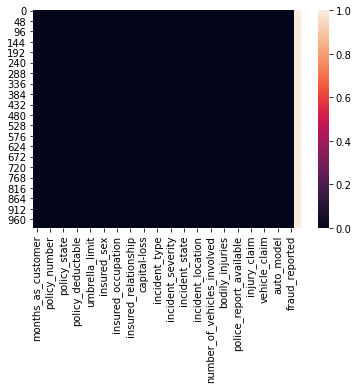

In [403]:
# plot the missing data on a heatmap
sns.heatmap(df.isna())

In [404]:
# check for highly correlated values 
df.corr()

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
auto_year                             -0.000292  0.001354      -0.000183   
_c39                                        NaN       NaN            NaN   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_number                        -0.006738               0.022566   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010870              -0.006247   
insured_zip                           0.004545               0.032354   
capital-gains                         0.035212              -0.013738   
capital-loss                         -0.023544               0.023547   
incident_hour_of_the_day              0.060935              -0.001578   
number_of_vehicles_involved           0.051214              -0.045991   
bodily_injuries                      -0.022765               0.026780   
witnesses                             0.066639               0.002332   
total_claim_amount                    0.022839               0.009094   
injury_claim                          0.039107              -0.017633   
property_claim                        0.064792              -0.011654   
vehicle_claim                         0.005269               0.020246   
auto_year                             0.026105              -0.049226   
_c39                                       NaN                    NaN   

                             umbrella_limit  insured_zip  capital-gains  \
months_as_customer                 0.015498     0.017895       0.006399   
age                                0.018126     0.025604      -0.007075   
policy_number                      0.008968     0.007083       0.009802   
policy_deductable                  0.010870     0.004545       0.035212   
policy_annual_premium             -0.006247     0.032354      -0.013738   
umbrella_limit                     1.000000     0.019671      -0.047268   
insured_zip                        0.019671     1.000000       0.006303   
capital-gains                     -0.047268     0.006303       1.000000   
capital-loss                      -0.024056     0.049372      -0.046904   
incident_hour_of_the_day          -0.023257     0.008274      -0.016406   
number_of_vehicles_involved       -0.021270     0.027448       0.061643   
bodily_injuries                    0.022743     0.028695       0.055829   
witnesses                         -0.006738     0.019805      -0.017651 

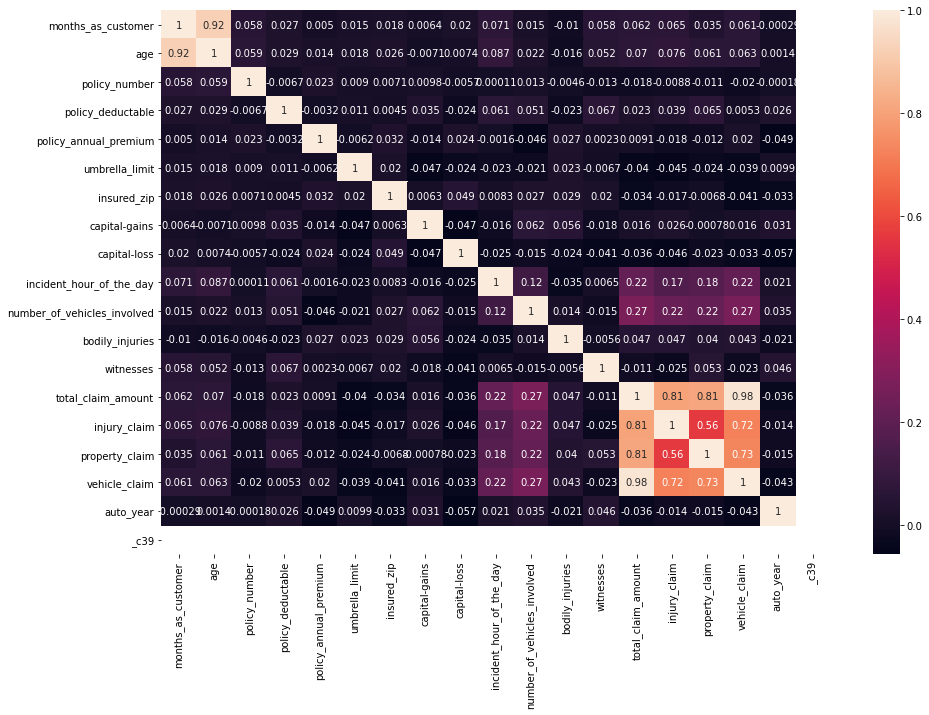

In [405]:
figure_this_size(15,10)
sns.heatmap(df.corr(),annot=True)

* There are 1000 samples in the dataset
* The dataset consists of 1000 samples
* There are 39 features in total.
* We have to predict if there's any insurance fraud or not.

In [406]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [407]:
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [408]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
0         466132        MALE                      MD       craft-repair   
1         468176        MALE                      MD  machine-op-inspct   
2         430632      FEMALE                     PhD              sales   
3         608117      FEMALE                     PhD       armed-forces   
4         610706        MALE               Associate              sales   
..           ...         ...                     ...                ...   
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
0          sleeping              husband          53300             0   
1           reading       other-relative              0             0   
2       board-games            own-child          35100             0   
3       board-games            unmarried          48900        -62400   
4       board-games            unmarried          66000        -46000   
..              ...                  ...            ...           ...   
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
0      25-01-2015  Single Vehicle Collision   Side Collision   
1      21-01-2015             Vehicle Theft                ?   
2      22-02-2015   Multi-vehicle Collision   Rear Collision   
3      10-01-2015  Single Vehicle Collision  Front Collision   
4      17-02-2015             Vehicle Theft                ?   
..   

In [409]:
df.insured_occupation.value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [410]:
# Removing the non -usefull columns.

In [411]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [412]:
redundant_cols = ['policy_number','policy_csl','policy_bind_date','policy_state','insured_relationship','insured_hobbies','incident_date','authorities_contacted','incident_state','incident_city','incident_location','incident_hour_of_the_day','number_of_vehicles_involved','_c39']

In [672]:
df_cleaned = df.drop(redundant_cols,1)

In [673]:
df_cleaned.head()

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                 328   48               1000                1406.91   
1                 228   42               2000                1197.22   
2                 134   29               2000                1413.14   
3                 256   41               2000                1415.74   
4                 228   44               1000                1583.91   

   umbrella_limit  insured_zip insured_sex insured_education_level  \
0               0       466132        MALE                      MD   
1         5000000       468176        MALE                      MD   
2         5000000       430632      FEMALE                     PhD   
3         6000000       608117      FEMALE                     PhD   
4         6000000       610706        MALE               Associate   

  insured_occupation  capital-gains  capital-loss             incident_type  \
0       craft-repair          53300             0  Single Vehicle Collision   
1  machine-op-inspct              0             0             Vehicle Theft   
2              sales          35100             0   Multi-vehicle Collision   
3       armed-forces          48900        -62400  Single Vehicle Collision   
4              sales          66000        -46000             Vehicle Theft   

    collision_type incident_severity property_damage  bodily_injuries  \
0   Side Collision      Major Damage             YES                1   
1                ?      Minor Damage               ?                0   
2   Rear Collision      Minor Damage              NO                2   
3  Front Collision      Major Damage               ?                1   
4                ?      Minor Damage              NO                0   

   witnesses police_report_available  total_claim_amount  injury_claim  \
0          2                     YES               71610          6510   
1          0                       ?                5070           780   
2          3                      NO               34650          7700   
3          2                      NO               63400          6340   
4          1                      NO                6500          1300   

   property_claim  vehicle_claim  auto_make auto_model  auto_year  \
0           13020          52080       Saab        92x       2004   
1             780           3510   Mercedes       E400       2007   
2            3850          23100      Dodge        RAM       2007   
3            6340          50720  Chevrolet      Tahoe       2014   
4             650           4550     Accura        RSX       2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N

In [674]:
df_cleaned.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [675]:
df_cleaned.shape

(1000, 26)

* We have reduced the featrures to 27 by removing the redundant columns.

In [676]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   months_as_customer       1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   policy_deductable        1000 non-null   int64  
 3   policy_annual_premium    1000 non-null   float64
 4   umbrella_limit           1000 non-null   int64  
 5   insured_zip              1000 non-null   int64  
 6   insured_sex              1000 non-null   object 
 7   insured_education_level  1000 non-null   object 
 8   insured_occupation       1000 non-null   object 
 9   capital-gains            1000 non-null   int64  
 10  capital-loss             1000 non-null   int64  
 11  incident_type            1000 non-null   object 
 12  collision_type           1000 non-null   object 
 13  incident_severity        1000 non-null   object 
 14  property_damage          

In [677]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   months_as_customer       1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   policy_deductable        1000 non-null   int64  
 3   policy_annual_premium    1000 non-null   float64
 4   umbrella_limit           1000 non-null   int64  
 5   insured_zip              1000 non-null   int64  
 6   insured_sex              1000 non-null   object 
 7   insured_education_level  1000 non-null   object 
 8   insured_occupation       1000 non-null   object 
 9   capital-gains            1000 non-null   int64  
 10  capital-loss             1000 non-null   int64  
 11  incident_type            1000 non-null   object 
 12  collision_type           1000 non-null   object 
 13  incident_severity        1000 non-null   object 
 14  property_damage          

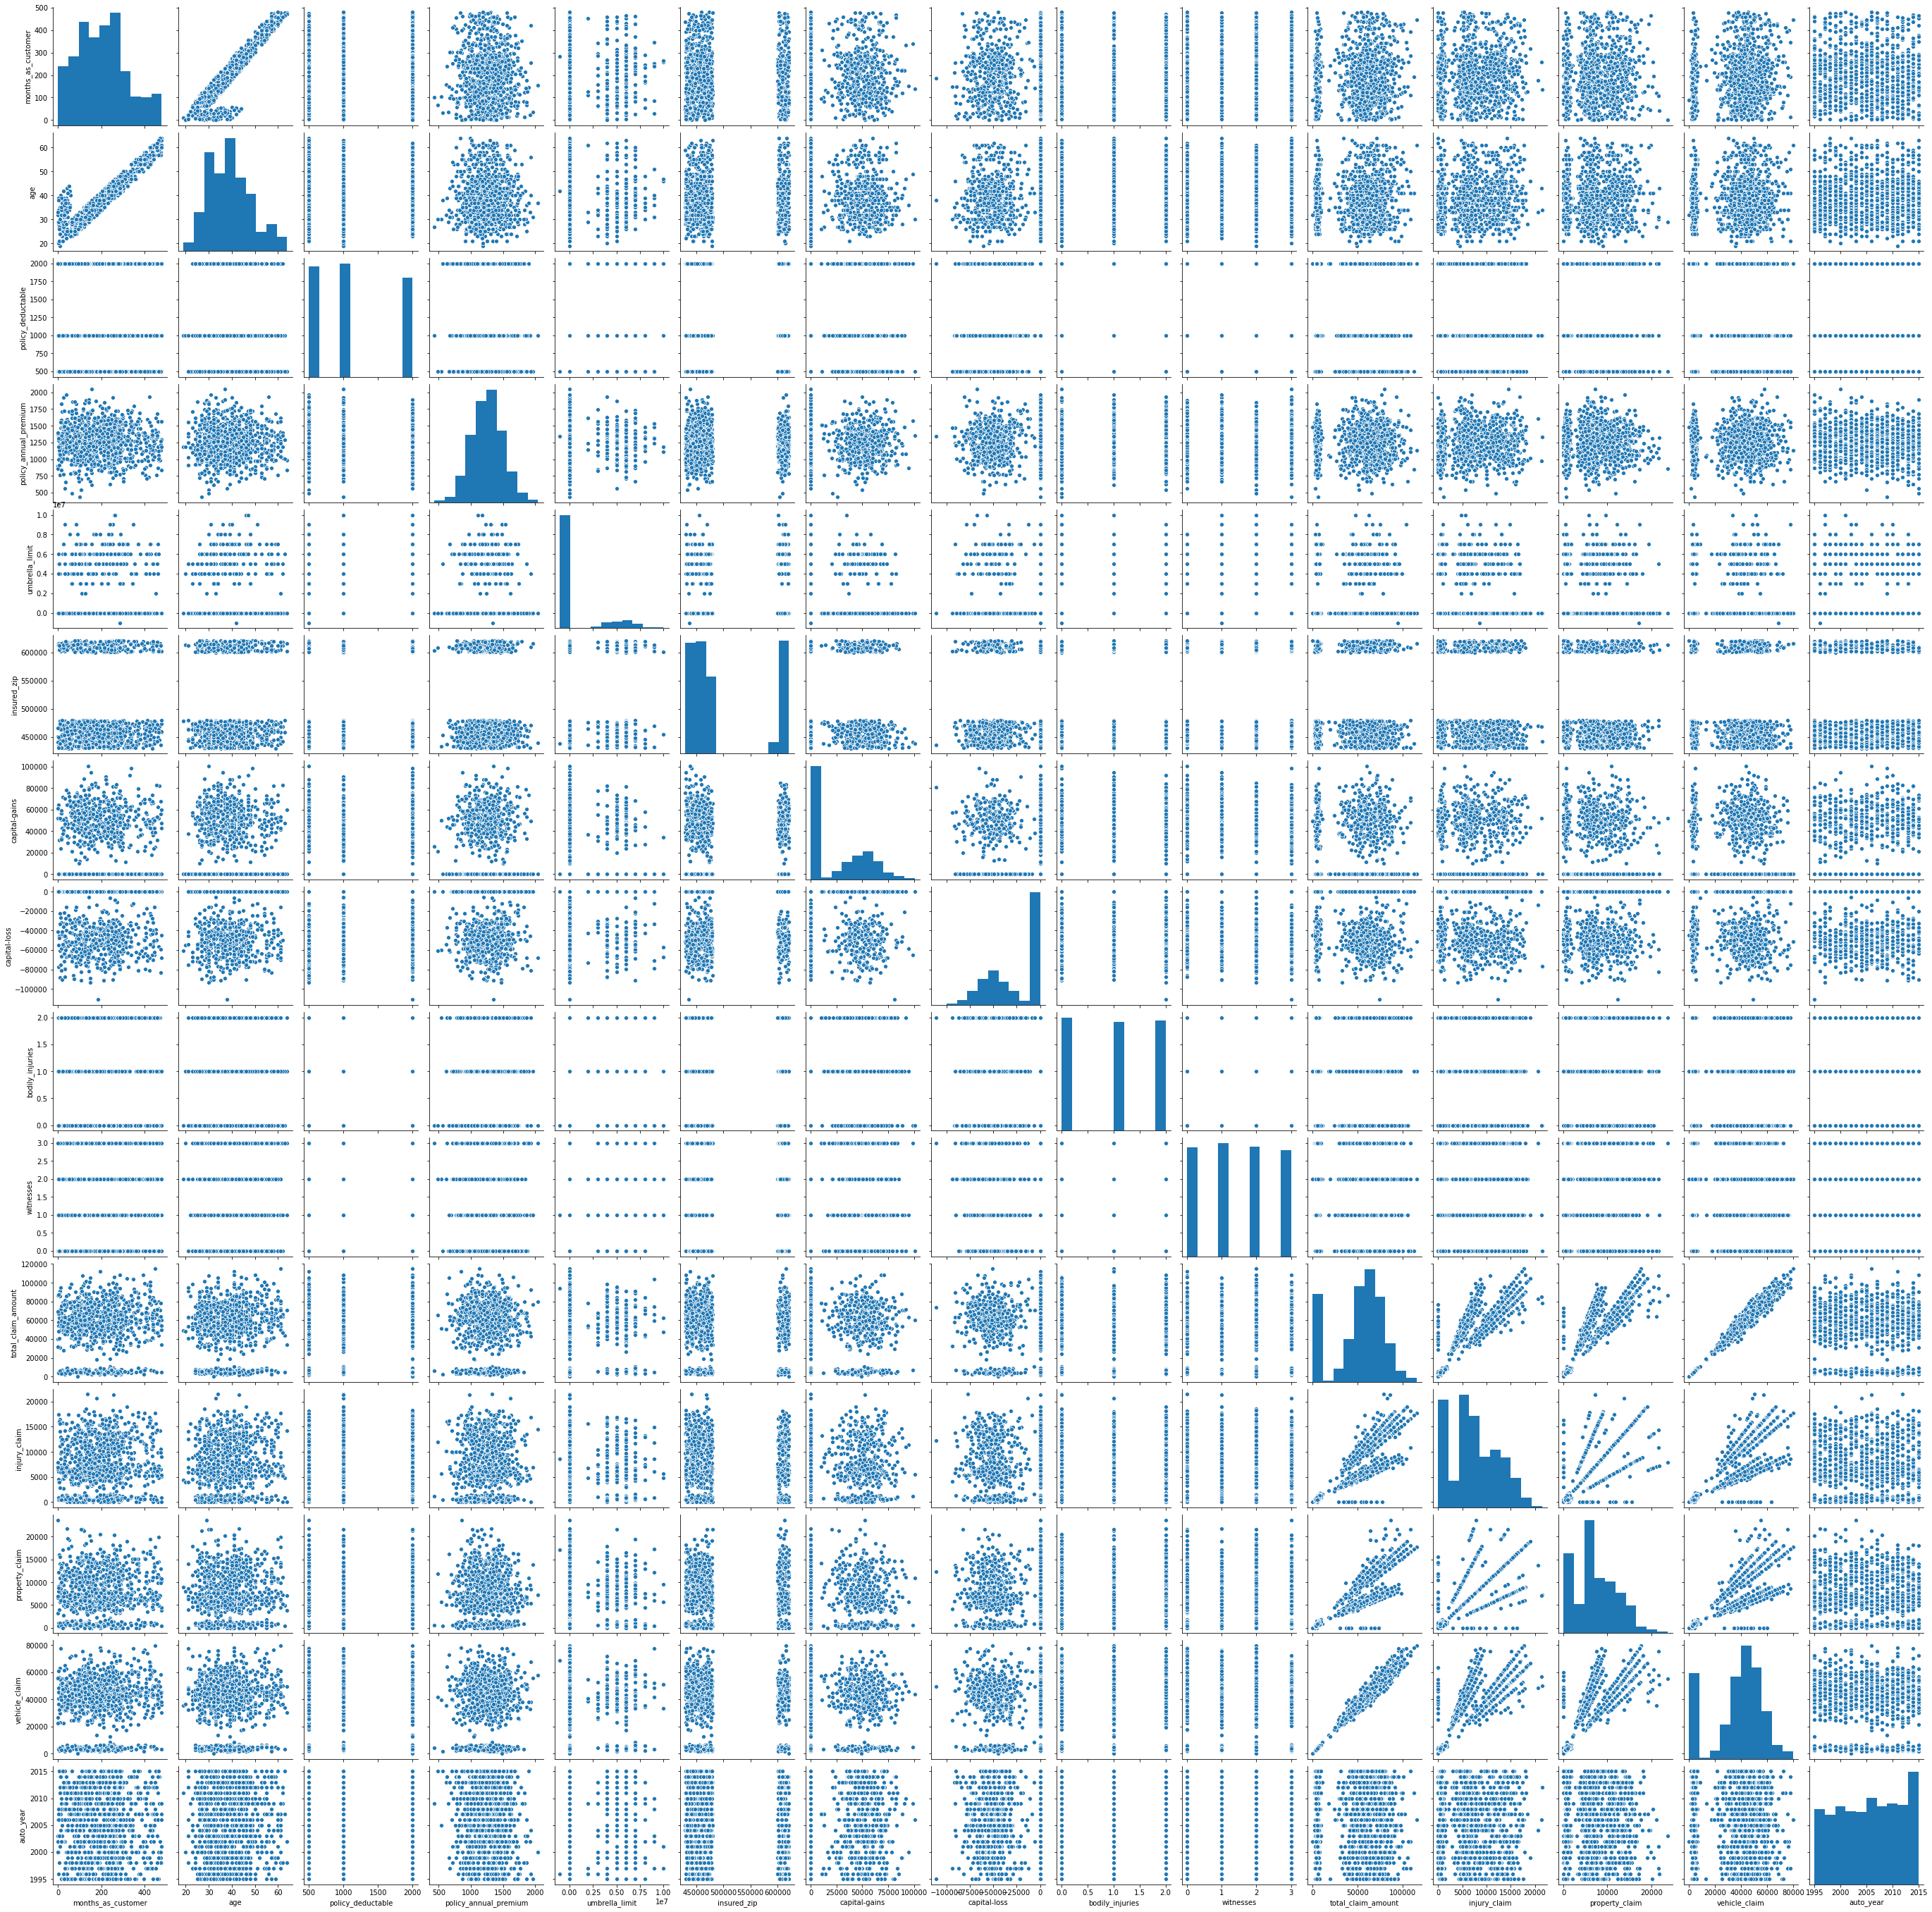

In [419]:
sns.pairplot(df_cleaned)

In [678]:
df_cleaned.head()

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                 328   48               1000                1406.91   
1                 228   42               2000                1197.22   
2                 134   29               2000                1413.14   
3                 256   41               2000                1415.74   
4                 228   44               1000                1583.91   

   umbrella_limit  insured_zip insured_sex insured_education_level  \
0               0       466132        MALE                      MD   
1         5000000       468176        MALE                      MD   
2         5000000       430632      FEMALE                     PhD   
3         6000000       608117      FEMALE                     PhD   
4         6000000       610706        MALE               Associate   

  insured_occupation  capital-gains  capital-loss             incident_type  \
0       craft-repair          53300             0  Single Vehicle Collision   
1  machine-op-inspct              0             0             Vehicle Theft   
2              sales          35100             0   Multi-vehicle Collision   
3       armed-forces          48900        -62400  Single Vehicle Collision   
4              sales          66000        -46000             Vehicle Theft   

    collision_type incident_severity property_damage  bodily_injuries  \
0   Side Collision      Major Damage             YES                1   
1                ?      Minor Damage               ?                0   
2   Rear Collision      Minor Damage              NO                2   
3  Front Collision      Major Damage               ?                1   
4                ?      Minor Damage              NO                0   

   witnesses police_report_available  total_claim_amount  injury_claim  \
0          2                     YES               71610          6510   
1          0                       ?                5070           780   
2          3                      NO               34650          7700   
3          2                      NO               63400          6340   
4          1                      NO                6500          1300   

   property_claim  vehicle_claim  auto_make auto_model  auto_year  \
0           13020          52080       Saab        92x       2004   
1             780           3510   Mercedes       E400       2007   
2            3850          23100      Dodge        RAM       2007   
3            6340          50720  Chevrolet      Tahoe       2014   
4             650           4550     Accura        RSX       2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N

* We can see that there are some ? values in the data, let's replace them with np.nan

In [679]:
df_cleaned = df_cleaned.replace('?',np.nan)

In [680]:
# now let's recheck for the missing values

In [681]:
df_cleaned.isna().sum()

months_as_customer           0
age                          0
policy_deductable            0
policy_annual_premium        0
umbrella_limit               0
insured_zip                  0
insured_sex                  0
insured_education_level      0
insured_occupation           0
capital-gains                0
capital-loss                 0
incident_type                0
collision_type             178
incident_severity            0
property_damage            360
bodily_injuries              0
witnesses                    0
police_report_available    343
total_claim_amount           0
injury_claim                 0
property_claim               0
vehicle_claim                0
auto_make                    0
auto_model                   0
auto_year                    0
fraud_reported               0
dtype: int64

In [682]:
# seperaating the num and object  datatyes 

In [683]:
num_var = _find_numerical_variables(df_cleaned)
cat_var = _find_categorical_variables(df_cleaned)

In [684]:
num_var

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [685]:
cat_var

['insured_sex',
 'insured_education_level',
 'insured_occupation',
 'incident_type',
 'collision_type',
 'incident_severity',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

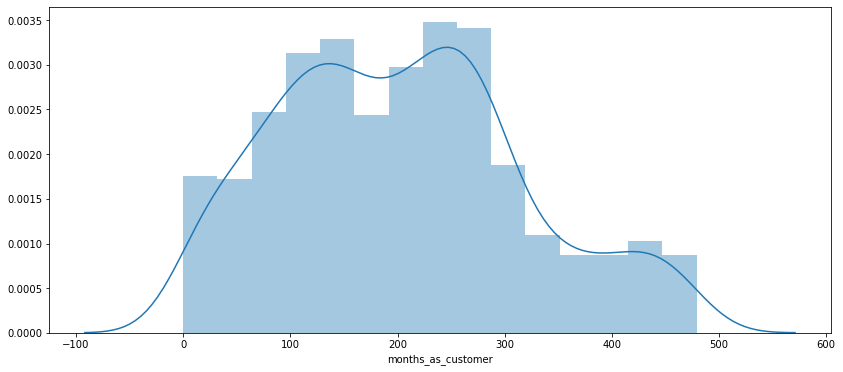

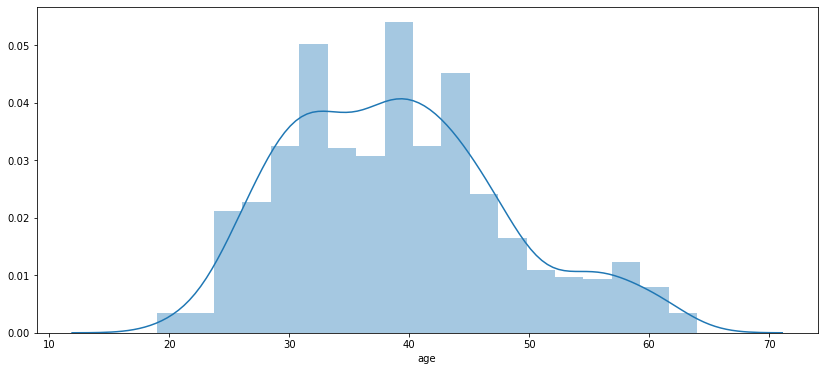

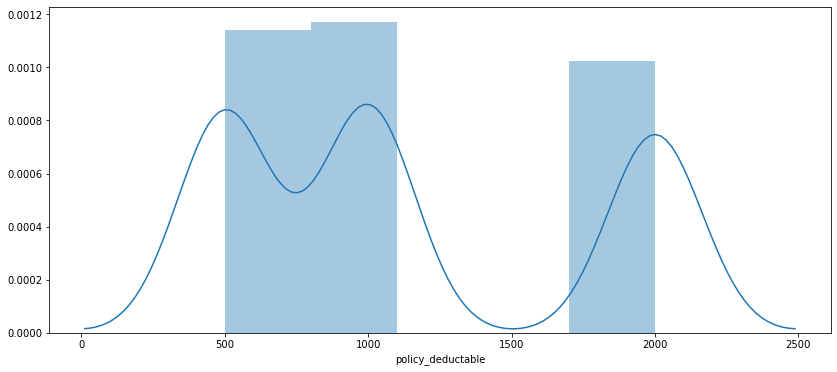

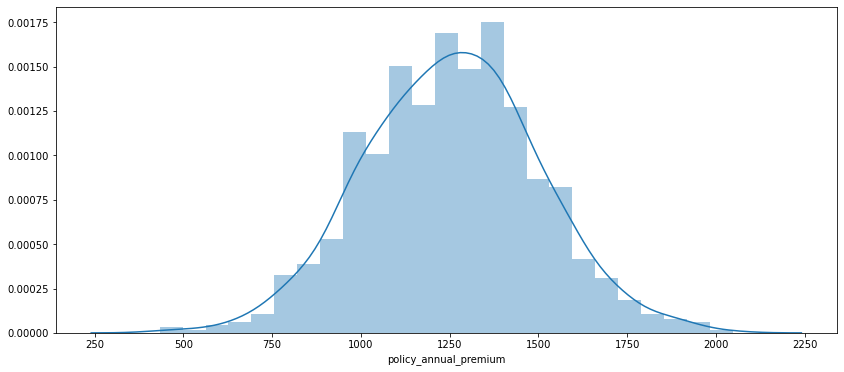

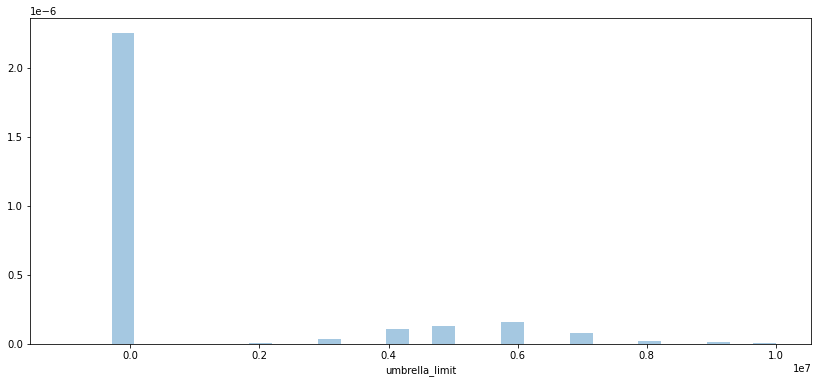

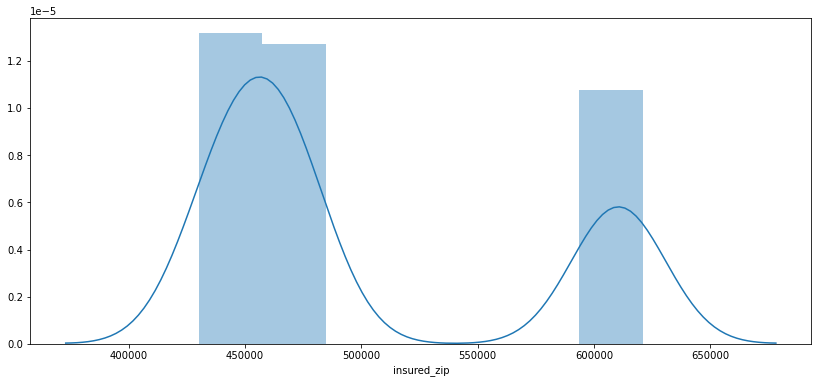

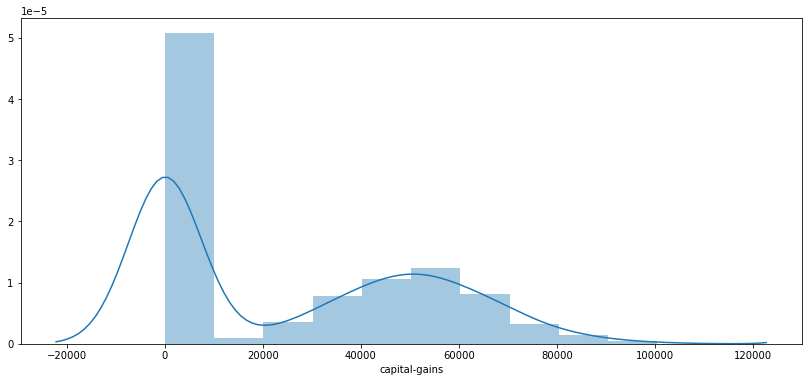

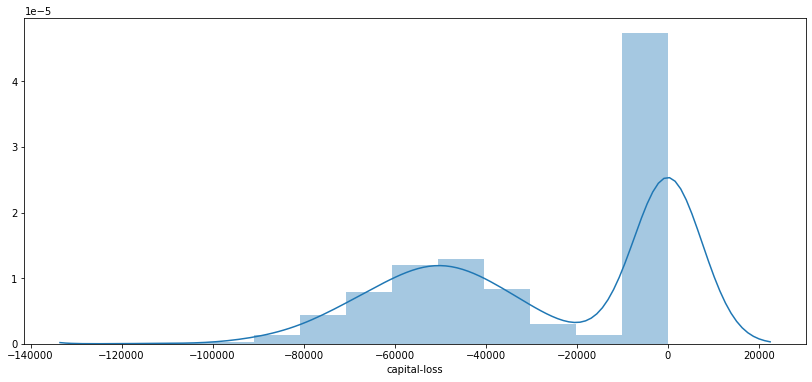

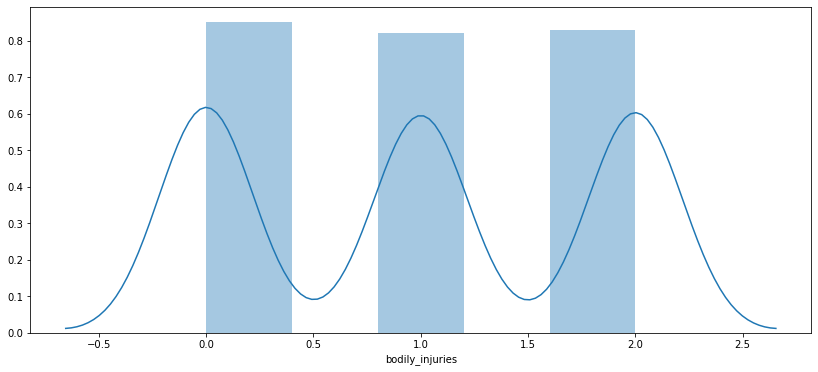

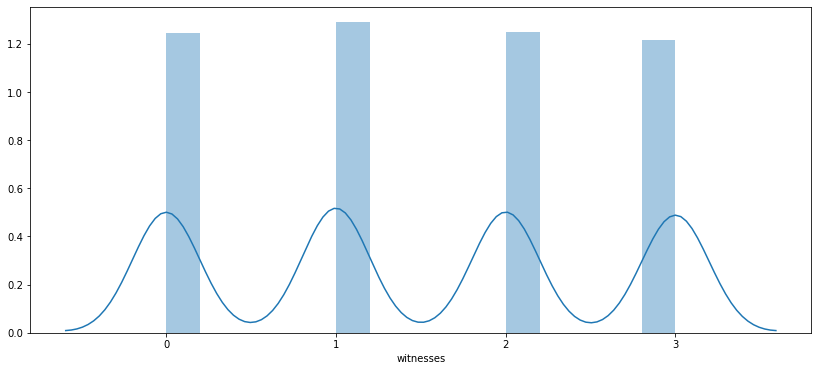

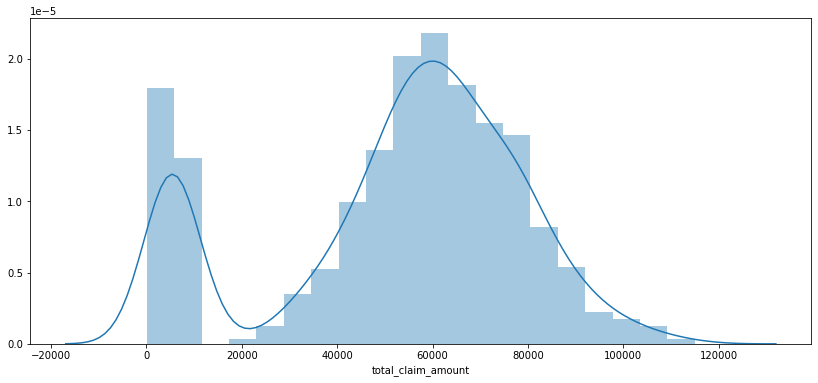

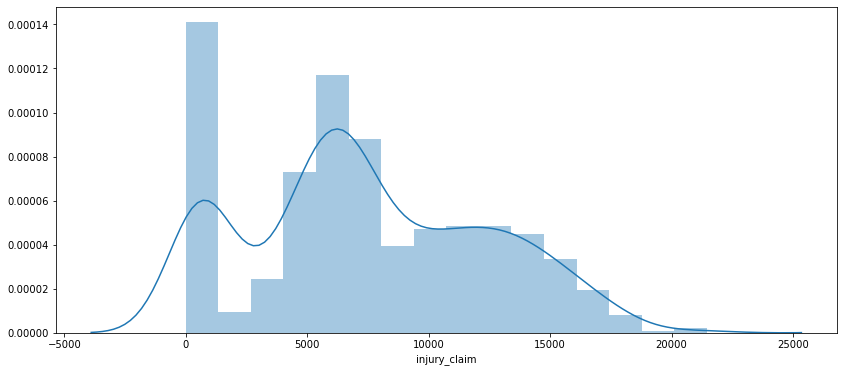

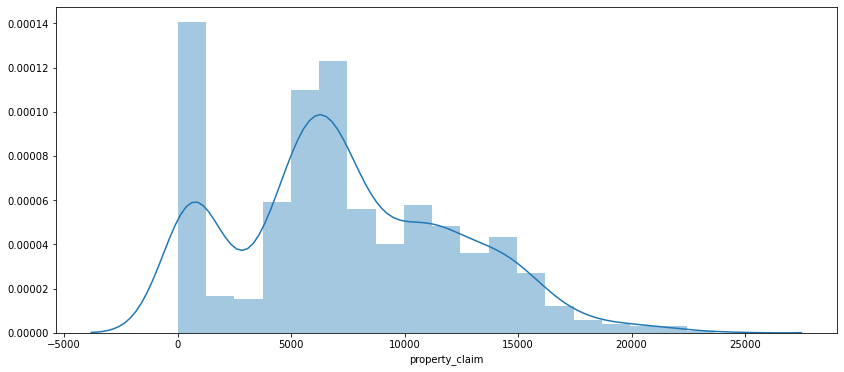

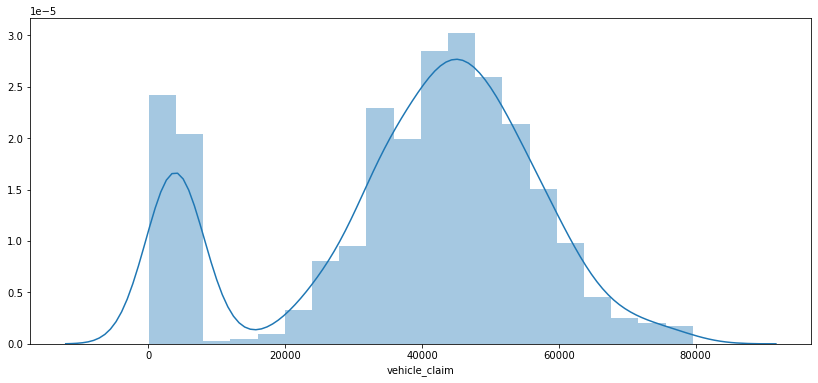

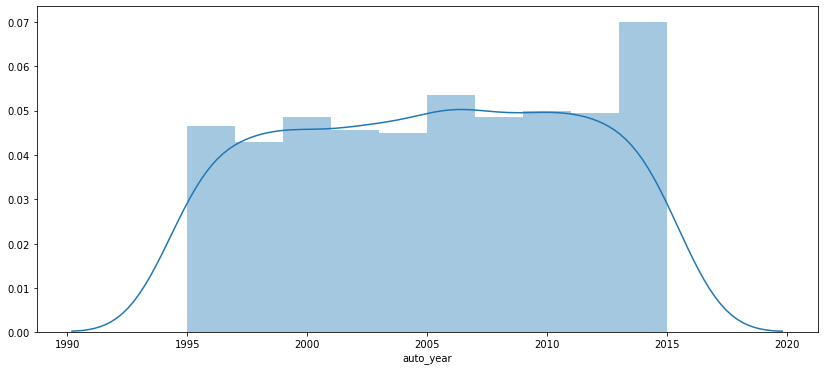

In [686]:
# checking fot some more dirty valuesin the dataset.
for col in num_var:
    figure_this_size(14,6)
    sns.distplot(df[col])

In [687]:
df_cleaned

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                   328   48               1000                1406.91   
1                   228   42               2000                1197.22   
2                   134   29               2000                1413.14   
3                   256   41               2000                1415.74   
4                   228   44               1000                1583.91   
..                  ...  ...                ...                    ...   
995                   3   38               1000                1310.80   
996                 285   41               1000                1436.79   
997                 130   34                500                1383.49   
998                 458   62               2000                1356.92   
999                 456   60               1000                 766.19   

     umbrella_limit  insured_zip insured_sex insured_education_level  \
0                 0       466132        MALE                      MD   
1           5000000       468176        MALE                      MD   
2           5000000       430632      FEMALE                     PhD   
3           6000000       608117      FEMALE                     PhD   
4           6000000       610706        MALE               Associate   
..              ...          ...         ...                     ...   
995               0       431289      FEMALE                 Masters   
996               0       608177      FEMALE                     PhD   
997         3000000       442797      FEMALE                 Masters   
998         5000000       441714        MALE               Associate   
999               0       612260      FEMALE               Associate   

    insured_occupation  capital-gains  capital-loss             incident_type  \
0         craft-repair          53300             0  Single Vehicle Collision   
1    machine-op-inspct              0             0             Vehicle Theft   
2                sales          35100             0   Multi-vehicle Collision   
3         armed-forces          48900        -62400  Single Vehicle Collision   
4                sales          66000        -46000             Vehicle Theft   
..                 ...            ...           ...                       ...   
995       craft-repair              0             0  Single Vehicle Collision   
996     prof-specialty          70900             0  Single Vehicle Collision   
997       armed-forces          35100             0   Multi-vehicle Collision   
998  handlers-cleaners              0             0  Single Vehicle Collision   
999              sales              0             0                Parked Car   

      collision_type incident_severity property_damage  bodily_injuries  \
0     Side Collision      Major Damage             YES                1   
1                NaN      Minor Damage             NaN                0   
2     Rear Collision      Minor Damage              NO                2   
3    Front Collision      Major Damage             NaN                1   
4                NaN      Minor Damage              NO                0   
..               ...               ...             ...              ...   
995  Front Collision      Minor Damage             YES                0   
996   Rear Collision      Major Damage             YES                2   
997   Side Collision      Minor Damage             NaN                2   
998   Rear Collision      Major Damage             NaN                0   
999              NaN      Minor Damage             NaN                0   

     witnesses police_report_available  total_claim_amount  injury_claim  \
0            2                     YES               71610          6510   
1            0                     NaN                5070           780   
2            3                      NO               34650          7700   
3            2                      NO               63400          6340 

## Univariate analysis.

In [688]:
## policy deductable:

In [689]:
df.policy_deductable.value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

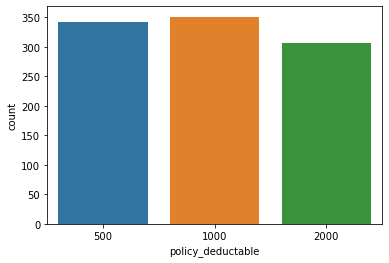

In [690]:
sns.countplot(df.policy_deductable)

In [691]:
## annual policy premium

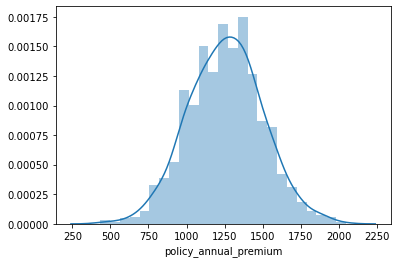

In [692]:
sns.distplot(df.policy_annual_premium)

In [693]:
## ubmeralla limit

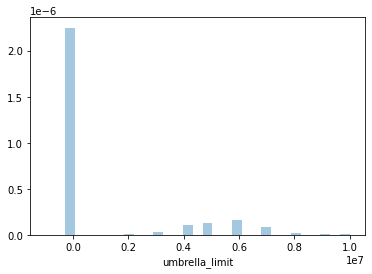

In [694]:
sns.distplot(df.umbrella_limit)

In [695]:
df_cleaned.umbrella_limit.value_counts()/len(df) * 100

 0           79.8
 6000000      5.7
 5000000      4.6
 4000000      3.9
 7000000      2.9
 3000000      1.2
 8000000      0.8
 9000000      0.5
 2000000      0.3
 10000000     0.2
-1000000      0.1
Name: umbrella_limit, dtype: float64

In [696]:
# We have around 80 percent of missing data which is in the form of 0 in the umberlla limit, thus we will be dropping this column

In [697]:
df_cleaned.drop('umbrella_limit',1,inplace=True)

In [698]:
df_cleaned.head()

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                 328   48               1000                1406.91   
1                 228   42               2000                1197.22   
2                 134   29               2000                1413.14   
3                 256   41               2000                1415.74   
4                 228   44               1000                1583.91   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

   capital-gains  capital-loss             incident_type   collision_type  \
0          53300             0  Single Vehicle Collision   Side Collision   
1              0             0             Vehicle Theft              NaN   
2          35100             0   Multi-vehicle Collision   Rear Collision   
3          48900        -62400  Single Vehicle Collision  Front Collision   
4          66000        -46000             Vehicle Theft              NaN   

  incident_severity property_damage  bodily_injuries  witnesses  \
0      Major Damage             YES                1          2   
1      Minor Damage             NaN                0          0   
2      Minor Damage              NO                2          3   
3      Major Damage             NaN                1          2   
4      Minor Damage              NO                0          1   

  police_report_available  total_claim_amount  injury_claim  property_claim  \
0                     YES               71610          6510           13020   
1                     NaN                5070           780             780   
2                      NO               34650          7700            3850   
3                      NO               63400          6340            6340   
4                      NO                6500          1300             650   

   vehicle_claim  auto_make auto_model  auto_year fraud_reported  
0          52080       Saab        92x       2004              Y  
1           3510   Mercedes       E400       2007              Y  
2          23100      Dodge        RAM       2007              N  
3          50720  Chevrolet      Tahoe       2014              Y  
4           4550     Accura        RSX       2009              N

In [699]:
## insured zip 

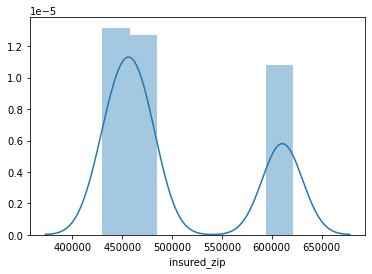

In [700]:
sns.distplot(df.insured_zip)

* This is a two phased value

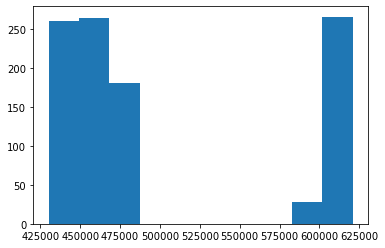

In [701]:
plt.hist(df.insured_zip);

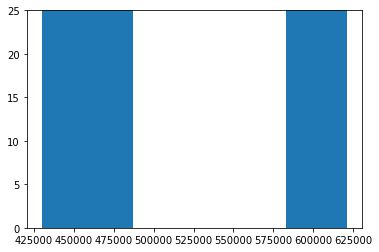

In [702]:
plt.hist(df.insured_zip)
plt.ylim([0,25]);

We can transform this into a binary categorcal value.
less than 500000 and greater than 500000

In [703]:
df_cleaned.insured_zip = df_cleaned.insured_zip.apply(lambda x: 1 if x > 500000 else 0)
df_cleaned.rename(columns={'insured_zip':'insured_zip_above_5L'},inplace=True)

In [704]:
df_cleaned

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                   328   48               1000                1406.91   
1                   228   42               2000                1197.22   
2                   134   29               2000                1413.14   
3                   256   41               2000                1415.74   
4                   228   44               1000                1583.91   
..                  ...  ...                ...                    ...   
995                   3   38               1000                1310.80   
996                 285   41               1000                1436.79   
997                 130   34                500                1383.49   
998                 458   62               2000                1356.92   
999                 456   60               1000                 766.19   

     insured_zip_above_5L insured_sex insured_education_level  \
0                       0        MALE                      MD   
1                       0        MALE                      MD   
2                       0      FEMALE                     PhD   
3                       1      FEMALE                     PhD   
4                       1        MALE               Associate   
..                    ...         ...                     ...   
995                     0      FEMALE                 Masters   
996                     1      FEMALE                     PhD   
997                     0      FEMALE                 Masters   
998                     0        MALE               Associate   
999                     1      FEMALE               Associate   

    insured_occupation  capital-gains  capital-loss             incident_type  \
0         craft-repair          53300             0  Single Vehicle Collision   
1    machine-op-inspct              0             0             Vehicle Theft   
2                sales          35100             0   Multi-vehicle Collision   
3         armed-forces          48900        -62400  Single Vehicle Collision   
4                sales          66000        -46000             Vehicle Theft   
..                 ...            ...           ...                       ...   
995       craft-repair              0             0  Single Vehicle Collision   
996     prof-specialty          70900             0  Single Vehicle Collision   
997       armed-forces          35100             0   Multi-vehicle Collision   
998  handlers-cleaners              0             0  Single Vehicle Collision   
999              sales              0             0                Parked Car   

      collision_type incident_severity property_damage  bodily_injuries  \
0     Side Collision      Major Damage             YES                1   
1                NaN      Minor Damage             NaN                0   
2     Rear Collision      Minor Damage              NO                2   
3    Front Collision      Major Damage             NaN                1   
4                NaN      Minor Damage              NO                0   
..               ...               ...             ...              ...   
995  Front Collision      Minor Damage             YES                0   
996   Rear Collision      Major Damage             YES                2   
997   Side Collision      Minor Damage             NaN                2   
998   Rear Collision      Major Damage             NaN                0   
999              NaN      Minor Damage             NaN                0   

     witnesses police_report_available  total_claim_amount  injury_claim  \
0            2                     YES               71610          6510   
1            0                     NaN                5070           780   
2            3                      NO               34650          7700   
3            2                      NO               63400          6340   
4            1                      NO                6500          1300   
..   

In [705]:
## capital gains and capital loss

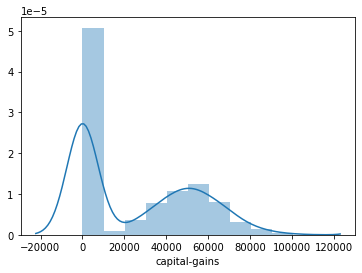

In [706]:
sns.distplot(df['capital-gains'])

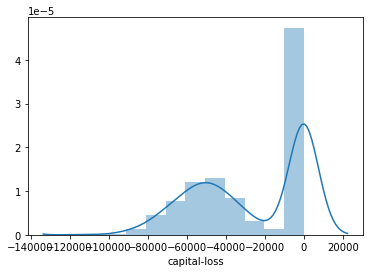

In [707]:
sns.distplot(df['capital-loss'])

* The value of capital gains can be zero as Capital gain is an increase in a capital asset's value. It is considered to be realized when you sell the asset.If you sell the asset at the same price you bought then your capital gains will be zero.
* Similar is the capital loss.

In [708]:
# bodily injuries.

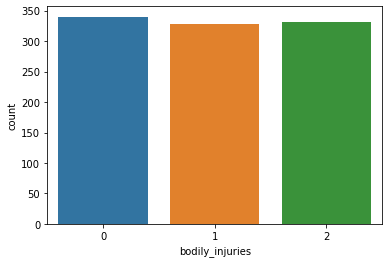

In [709]:
sns.countplot(df.bodily_injuries)

In [710]:
# police report available

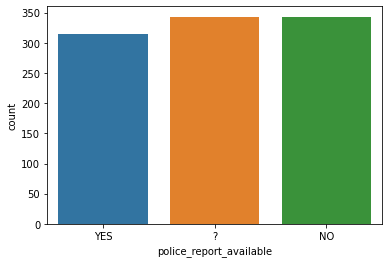

In [711]:
sns.countplot(df.police_report_available)

In [712]:
df_cleaned.police_report_available.isna().sum()

343

* Containes missing values.

In [713]:
## property damage.

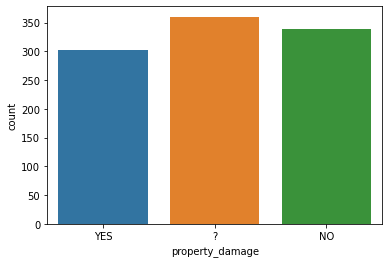

In [714]:
sns.countplot(df.property_damage)

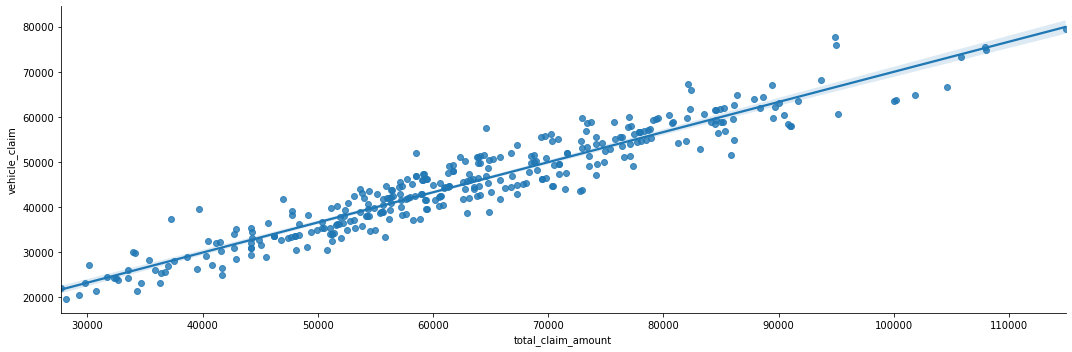

In [715]:
sns.lmplot('total_claim_amount','vehicle_claim',data=df_cleaned.dropna(),aspect=3)

In [716]:
df_cleaned

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                   328   48               1000                1406.91   
1                   228   42               2000                1197.22   
2                   134   29               2000                1413.14   
3                   256   41               2000                1415.74   
4                   228   44               1000                1583.91   
..                  ...  ...                ...                    ...   
995                   3   38               1000                1310.80   
996                 285   41               1000                1436.79   
997                 130   34                500                1383.49   
998                 458   62               2000                1356.92   
999                 456   60               1000                 766.19   

     insured_zip_above_5L insured_sex insured_education_level  \
0                       0        MALE                      MD   
1                       0        MALE                      MD   
2                       0      FEMALE                     PhD   
3                       1      FEMALE                     PhD   
4                       1        MALE               Associate   
..                    ...         ...                     ...   
995                     0      FEMALE                 Masters   
996                     1      FEMALE                     PhD   
997                     0      FEMALE                 Masters   
998                     0        MALE               Associate   
999                     1      FEMALE               Associate   

    insured_occupation  capital-gains  capital-loss             incident_type  \
0         craft-repair          53300             0  Single Vehicle Collision   
1    machine-op-inspct              0             0             Vehicle Theft   
2                sales          35100             0   Multi-vehicle Collision   
3         armed-forces          48900        -62400  Single Vehicle Collision   
4                sales          66000        -46000             Vehicle Theft   
..                 ...            ...           ...                       ...   
995       craft-repair              0             0  Single Vehicle Collision   
996     prof-specialty          70900             0  Single Vehicle Collision   
997       armed-forces          35100             0   Multi-vehicle Collision   
998  handlers-cleaners              0             0  Single Vehicle Collision   
999              sales              0             0                Parked Car   

      collision_type incident_severity property_damage  bodily_injuries  \
0     Side Collision      Major Damage             YES                1   
1                NaN      Minor Damage             NaN                0   
2     Rear Collision      Minor Damage              NO                2   
3    Front Collision      Major Damage             NaN                1   
4                NaN      Minor Damage              NO                0   
..               ...               ...             ...              ...   
995  Front Collision      Minor Damage             YES                0   
996   Rear Collision      Major Damage             YES                2   
997   Side Collision      Minor Damage             NaN                2   
998   Rear Collision      Major Damage             NaN                0   
999              NaN      Minor Damage             NaN                0   

     witnesses police_report_available  total_claim_amount  injury_claim  \
0            2                     YES               71610          6510   
1            0                     NaN                5070           780   
2            3                      NO               34650          7700   
3            2                      NO               63400          6340   
4            1                      NO                6500          1300   
..   

In [717]:
## Addressing the missing value.

In [718]:
df_cleaned

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                   328   48               1000                1406.91   
1                   228   42               2000                1197.22   
2                   134   29               2000                1413.14   
3                   256   41               2000                1415.74   
4                   228   44               1000                1583.91   
..                  ...  ...                ...                    ...   
995                   3   38               1000                1310.80   
996                 285   41               1000                1436.79   
997                 130   34                500                1383.49   
998                 458   62               2000                1356.92   
999                 456   60               1000                 766.19   

     insured_zip_above_5L insured_sex insured_education_level  \
0                       0        MALE                      MD   
1                       0        MALE                      MD   
2                       0      FEMALE                     PhD   
3                       1      FEMALE                     PhD   
4                       1        MALE               Associate   
..                    ...         ...                     ...   
995                     0      FEMALE                 Masters   
996                     1      FEMALE                     PhD   
997                     0      FEMALE                 Masters   
998                     0        MALE               Associate   
999                     1      FEMALE               Associate   

    insured_occupation  capital-gains  capital-loss             incident_type  \
0         craft-repair          53300             0  Single Vehicle Collision   
1    machine-op-inspct              0             0             Vehicle Theft   
2                sales          35100             0   Multi-vehicle Collision   
3         armed-forces          48900        -62400  Single Vehicle Collision   
4                sales          66000        -46000             Vehicle Theft   
..                 ...            ...           ...                       ...   
995       craft-repair              0             0  Single Vehicle Collision   
996     prof-specialty          70900             0  Single Vehicle Collision   
997       armed-forces          35100             0   Multi-vehicle Collision   
998  handlers-cleaners              0             0  Single Vehicle Collision   
999              sales              0             0                Parked Car   

      collision_type incident_severity property_damage  bodily_injuries  \
0     Side Collision      Major Damage             YES                1   
1                NaN      Minor Damage             NaN                0   
2     Rear Collision      Minor Damage              NO                2   
3    Front Collision      Major Damage             NaN                1   
4                NaN      Minor Damage              NO                0   
..               ...               ...             ...              ...   
995  Front Collision      Minor Damage             YES                0   
996   Rear Collision      Major Damage             YES                2   
997   Side Collision      Minor Damage             NaN                2   
998   Rear Collision      Major Damage             NaN                0   
999              NaN      Minor Damage             NaN                0   

     witnesses police_report_available  total_claim_amount  injury_claim  \
0            2                     YES               71610          6510   
1            0                     NaN                5070           780   
2            3                      NO               34650          7700   
3            2                      NO               63400          6340   
4            1                      NO                6500          1300   
..   

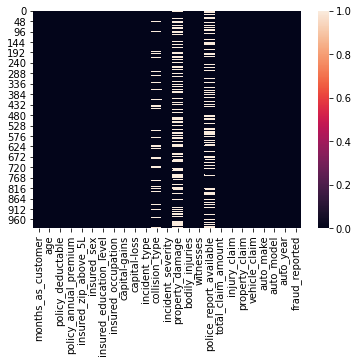

In [719]:
sns.heatmap(df_cleaned.isna())

In [720]:
df_cleaned.isna().sum()

months_as_customer           0
age                          0
policy_deductable            0
policy_annual_premium        0
insured_zip_above_5L         0
insured_sex                  0
insured_education_level      0
insured_occupation           0
capital-gains                0
capital-loss                 0
incident_type                0
collision_type             178
incident_severity            0
property_damage            360
bodily_injuries              0
witnesses                    0
police_report_available    343
total_claim_amount           0
injury_claim                 0
property_claim               0
vehicle_claim                0
auto_make                    0
auto_model                   0
auto_year                    0
fraud_reported               0
dtype: int64

In [721]:
df_cleaned.isna().mean()

months_as_customer         0.000
age                        0.000
policy_deductable          0.000
policy_annual_premium      0.000
insured_zip_above_5L       0.000
insured_sex                0.000
insured_education_level    0.000
insured_occupation         0.000
capital-gains              0.000
capital-loss               0.000
incident_type              0.000
collision_type             0.178
incident_severity          0.000
property_damage            0.360
bodily_injuries            0.000
witnesses                  0.000
police_report_available    0.343
total_claim_amount         0.000
injury_claim               0.000
property_claim             0.000
vehicle_claim              0.000
auto_make                  0.000
auto_model                 0.000
auto_year                  0.000
fraud_reported             0.000
dtype: float64

* The missing values in the feautres poliuce_report_available and bodiliy injuries are more tan 35 percent , so i0ts better to completely remove those 2 columns.

In [722]:
df_cleaned.drop(['property_damage','police_report_available'],1,inplace=True)

In [723]:
df_cleaned.isna().sum()

months_as_customer           0
age                          0
policy_deductable            0
policy_annual_premium        0
insured_zip_above_5L         0
insured_sex                  0
insured_education_level      0
insured_occupation           0
capital-gains                0
capital-loss                 0
incident_type                0
collision_type             178
incident_severity            0
bodily_injuries              0
witnesses                    0
total_claim_amount           0
injury_claim                 0
property_claim               0
vehicle_claim                0
auto_make                    0
auto_model                   0
auto_year                    0
fraud_reported               0
dtype: int64

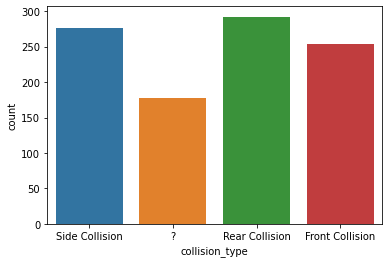

In [724]:
sns.countplot(df.collision_type)

In [725]:
# addressing the collision type.

In [726]:
# let's keep the data and label it as missing data.

In [727]:
from feature_engine.missing_data_imputers import CategoricalVariableImputer

In [728]:
df_cleaned = CategoricalVariableImputer(variables=['collision_type']).fit_transform(df_cleaned)

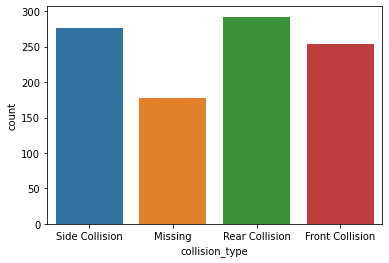

In [729]:
sns.countplot(df_cleaned.collision_type)

In [730]:
## Removing the outlirs 

In [731]:
# seperating the num and categorical variables.

In [732]:
len(df_cleaned)

1000

In [733]:
cat_var = _find_categorical_variables(df_cleaned)
num_var = _find_numerical_variables(df_cleaned)

In [734]:
cat_var

['insured_sex',
 'insured_education_level',
 'insured_occupation',
 'incident_type',
 'collision_type',
 'incident_severity',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [735]:
num_var

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'insured_zip_above_5L',
 'capital-gains',
 'capital-loss',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [736]:
z_scores = stats.zscore(df_cleaned[num_var])

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df_cleaned = df_cleaned[filtered_entries]

In [737]:
len(df_cleaned)

995

* Removed 5 outliers.

In [738]:
## skew transformation

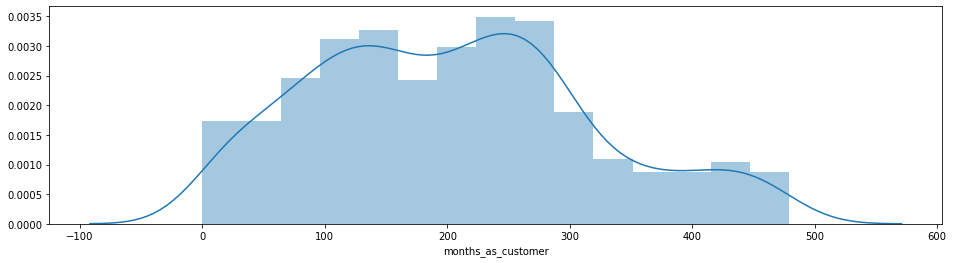

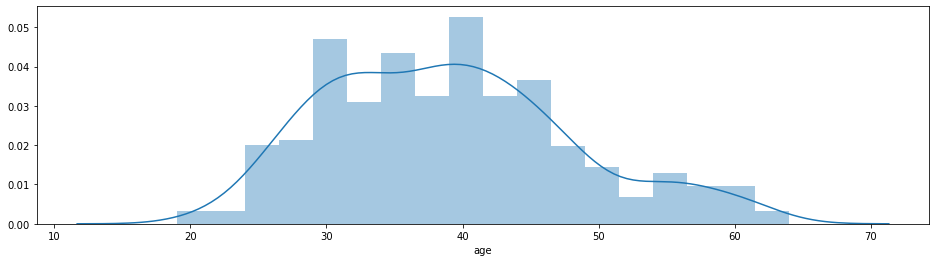

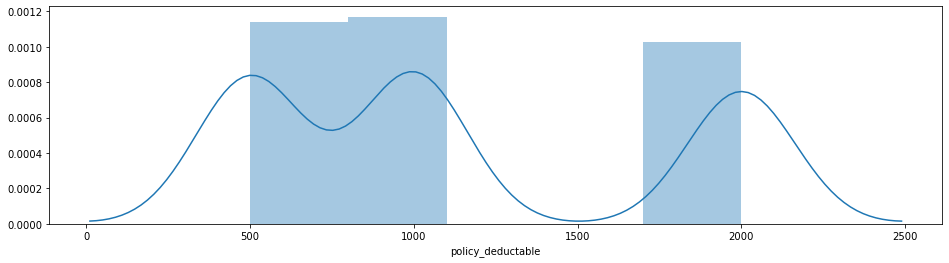

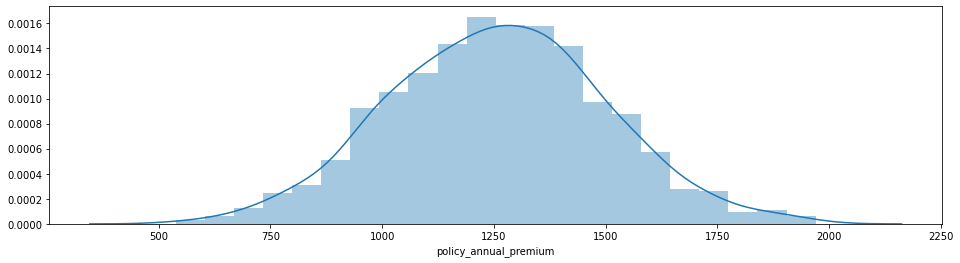

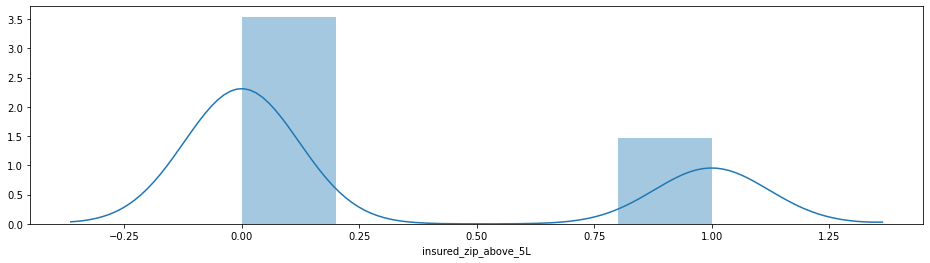

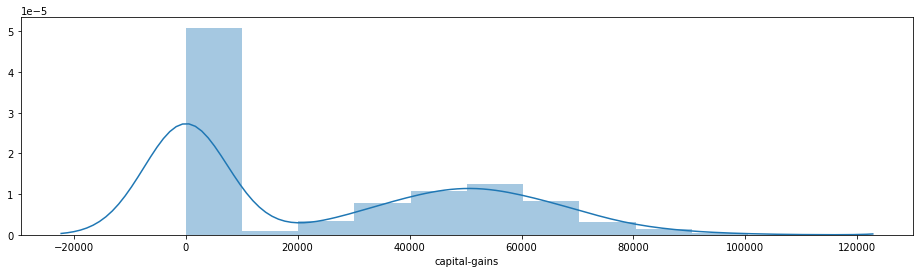

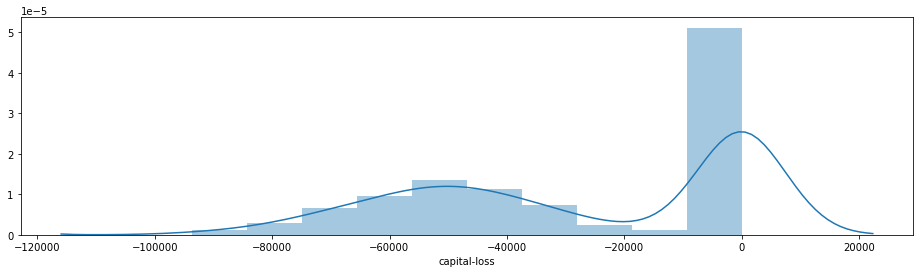

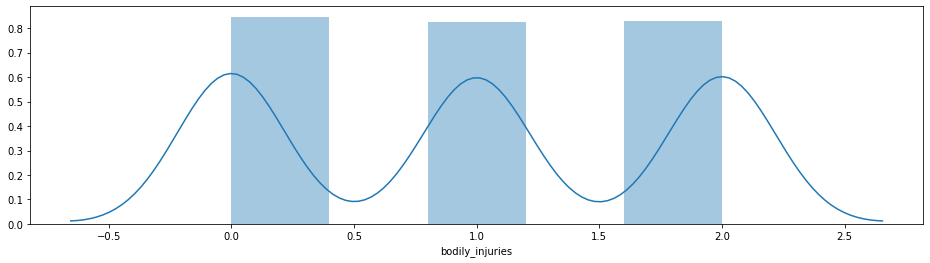

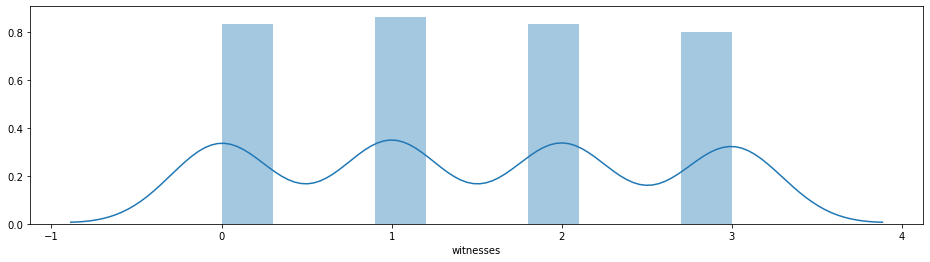

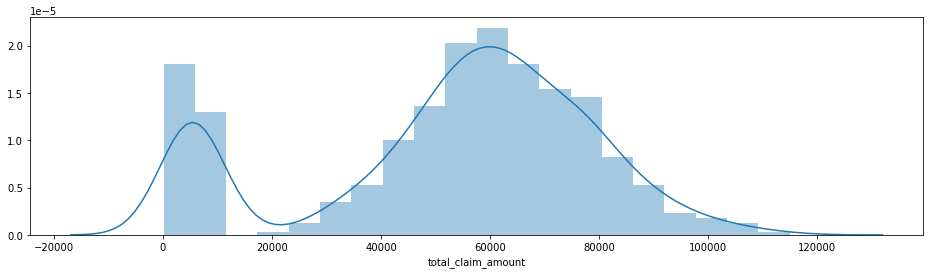

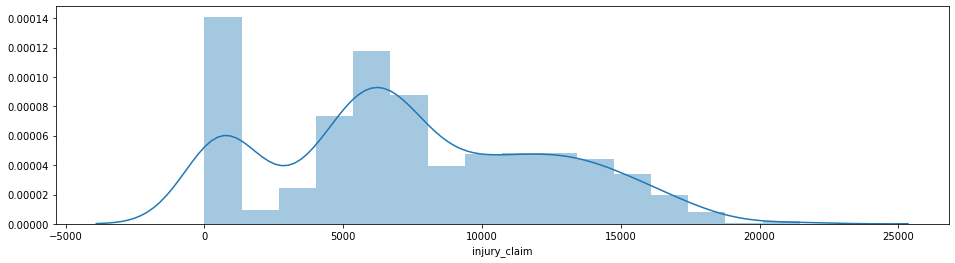

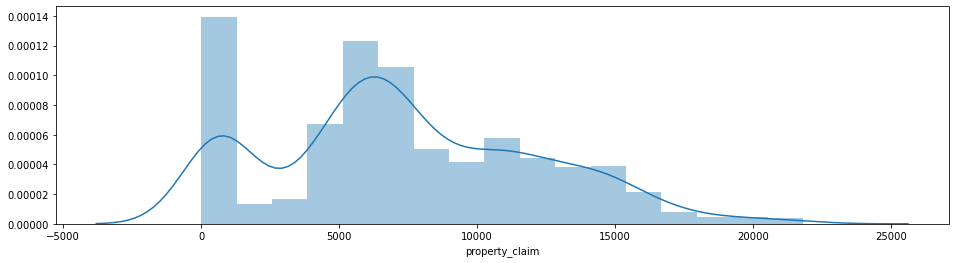

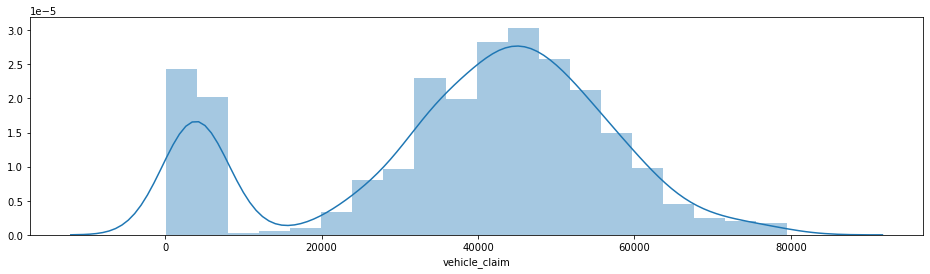

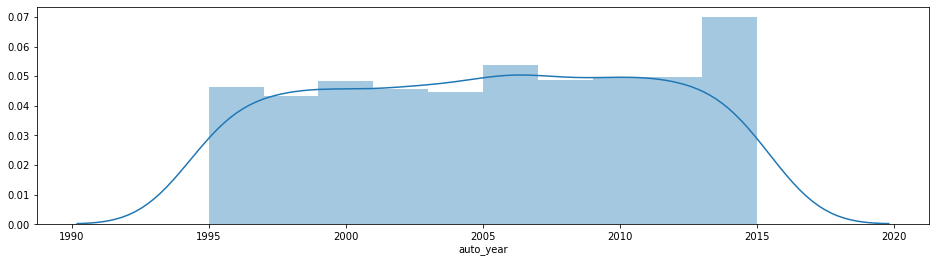

In [739]:
for col in num_var:
    figure_this_size(16,4)
    sns.distplot(df_cleaned[col])

skew_stats

In [740]:
df_cleaned.skew()

months_as_customer       0.358958
age                      0.473974
policy_deductable        0.475849
policy_annual_premium    0.033107
insured_zip_above_5L     0.913845
capital-gains            0.479472
capital-loss            -0.379708
bodily_injuries          0.012979
witnesses                0.027371
total_claim_amount      -0.591848
injury_claim             0.270253
property_claim           0.359528
vehicle_claim           -0.618189
auto_year               -0.049758
dtype: float64

In [741]:
# skews are valid.

## One Hot Enconding.

In [742]:
cat_var

['insured_sex',
 'insured_education_level',
 'insured_occupation',
 'incident_type',
 'collision_type',
 'incident_severity',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [743]:
df_cleaned.head()

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                 328   48               1000                1406.91   
1                 228   42               2000                1197.22   
2                 134   29               2000                1413.14   
3                 256   41               2000                1415.74   
4                 228   44               1000                1583.91   

   insured_zip_above_5L insured_sex insured_education_level  \
0                     0        MALE                      MD   
1                     0        MALE                      MD   
2                     0      FEMALE                     PhD   
3                     1      FEMALE                     PhD   
4                     1        MALE               Associate   

  insured_occupation  capital-gains  capital-loss             incident_type  \
0       craft-repair          53300             0  Single Vehicle Collision   
1  machine-op-inspct              0             0             Vehicle Theft   
2              sales          35100             0   Multi-vehicle Collision   
3       armed-forces          48900        -62400  Single Vehicle Collision   
4              sales          66000        -46000             Vehicle Theft   

    collision_type incident_severity  bodily_injuries  witnesses  \
0   Side Collision      Major Damage                1          2   
1          Missing      Minor Damage                0          0   
2   Rear Collision      Minor Damage                2          3   
3  Front Collision      Major Damage                1          2   
4          Missing      Minor Damage                0          1   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080       Saab   
1                5070           780             780           3510   Mercedes   
2               34650          7700            3850          23100      Dodge   
3               63400          6340            6340          50720  Chevrolet   
4                6500          1300             650           4550     Accura   

  auto_model  auto_year fraud_reported  
0        92x       2004              Y  
1       E400       2007              Y  
2        RAM       2007              N  
3      Tahoe       2014              Y  
4        RSX       2009              N

In [744]:
enc = OneHotCategoricalEncoder(variables=cat_var,drop_last=True)

In [745]:
df_cleaned = enc.fit_transform(df_cleaned)

In [746]:
df_cleaned.head()

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                 328   48               1000                1406.91   
1                 228   42               2000                1197.22   
2                 134   29               2000                1413.14   
3                 256   41               2000                1415.74   
4                 228   44               1000                1583.91   

   insured_zip_above_5L  capital-gains  capital-loss  bodily_injuries  \
0                     0          53300             0                1   
1                     0              0             0                0   
2                     0          35100             0                2   
3                     1          48900        -62400                1   
4                     1          66000        -46000                0   

   witnesses  total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0          2               71610          6510           13020          52080   
1          0                5070           780             780           3510   
2          3               34650          7700            3850          23100   
3          2               63400          6340            6340          50720   
4          1                6500          1300             650           4550   

   auto_year  insured_sex_MALE  insured_education_level_MD  \
0       2004                 1                           1   
1       2007                 1                           1   
2       2007                 0                           0   
3       2014                 0                           0   
4       2009                 1                           0   

   insured_education_level_PhD  insured_education_level_Associate  \
0                            0                                  0   
1                            0                                  0   
2                            1                                  0   
3                            1                                  0   
4                            0                                  1   

   insured_education_level_Masters  insured_education_level_High School  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   insured_education_level_College  insured_occupation_craft-repair  \
0                                0                                1   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   insured_occupation_machine-op-inspct  insured_occupation_sales  \
0                                     0                         0   
1                                     1                         0   
2                                     0                         1   
3                                     0                         0   
4                                     0                         1   

   insured_occupation_armed-forces  insured_occupation_tech-support  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                1                                0   
4                                0                                0   

   insured_occupation_prof-specialty  insured_occupation_other-service  \
0                                  0                          

In [631]:
# Standard Scaling

In [635]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [645]:
ct = ColumnTransformer(transformers=[('scalar',StandardScaler(),num_var)],remainder='passthrough')

In [647]:
df_cleaned = ct.fit_transform(df_cleaned)

In [649]:
df_cleaned = pd.DataFrame(df_cleaned)

In [650]:
df_cleaned

0         1         2         3         4         5         6  \
0    1.073984  0.986592 -0.223417  0.621478 -0.642925  1.013699  0.954606   
1    0.204584  0.330183  1.411141 -0.250891 -0.642925 -0.900320  0.954606   
2   -0.612651 -1.092035  1.411141  0.647396 -0.642925  0.360132  0.954606   
3    0.448016  0.220782  1.411141  0.658213  1.555392  0.855694 -1.277433   
4    0.204584  0.548986 -0.223417  1.357847  1.555392  1.469760 -0.690808   
..        ...       ...       ...       ...       ...       ...       ...   
990 -1.751565 -0.107422 -0.223417  0.221633 -0.642925 -0.900320  0.954606   
991  0.700142  0.220782 -0.223417  0.745787  1.555392  1.645720  0.954606   
992 -0.647427 -0.545028 -1.040696  0.524044 -0.642925  0.360132  0.954606   
993  2.204203  2.518212  1.411141  0.413506 -0.642925 -0.900320  0.954606   
994  2.186815  2.299409 -0.223417 -2.044096  1.555392 -0.900320  0.954606   

            7         8         9        10        11        12        13  \
0    0.008593  0.468407  0.716696 -0.187157  1.175508  0.750846 -0.184194   
1   -1.212826 -1.334551 -1.807055 -1.362033 -1.375940 -1.822872  0.315188   
2    1.230012  1.369886 -0.685135  0.056840 -0.735994 -0.784800  0.315188   
3    0.008593  0.468407  0.405305 -0.222014 -0.216949  0.678780  1.480413   
4   -1.212826 -0.433072 -1.752817 -1.255413 -1.403039 -1.767762  0.648109   
..        ...       ...       ...       ...       ...       ...       ...   
990 -1.212826 -0.433072  1.307999  2.053925  0.279166  1.225636  0.148727   
991  1.230012  1.369886  2.115114  2.185151  2.230274  1.823361  1.646873   
992  1.230012  1.369886  0.560811  0.015832  0.024855  0.773102 -1.515880   
993 -1.212826 -0.433072 -0.217478 -0.451658 -0.450415 -0.072616 -1.182958   
994 -1.212826  1.369886 -1.807434 -1.427646 -1.346757 -1.813864  0.315188   

      14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
0    1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1    1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
2    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
4    1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
990  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
991  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
992  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
993  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
994  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   

      28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
0    0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
990  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
991  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
992  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0   
993  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
994  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   

      42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3   

In [651]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
0         466132        MALE                      MD       craft-repair   
1         468176        MALE                      MD  machine-op-inspct   
2         430632      FEMALE                     PhD              sales   
3         608117      FEMALE                     PhD       armed-forces   
4         610706        MALE               Associate              sales   
..           ...         ...                     ...                ...   
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
0          sleeping              husband          53300             0   
1           reading       other-relative              0             0   
2       board-games            own-child          35100             0   
3       board-games            unmarried          48900        -62400   
4       board-games            unmarried          66000        -46000   
..              ...                  ...            ...           ...   
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
0      25-01-2015  Single Vehicle Collision   Side Collision   
1      21-01-2015             Vehicle Theft                ?   
2      22-02-2015   Multi-vehicle Collision   Rear Collision   
3      10-01-2015  Single Vehicle Collision  Front Collision   
4      17-02-2015             Vehicle Theft                ?   
..   

## X and y split

In [747]:
X = df_cleaned.iloc[:,:-1]
y = df_cleaned.iloc[:,-1]

In [748]:
# check the shape
X.shape,y.shape

((995, 94), (995,))

In [749]:
## Train Test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

## Buliding the model.

In [662]:
# importing the training dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [663]:
# importing the evalation metrics 
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

In [664]:
# helper funciton
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    print('Train_Acc:', model.score(X_train,y_train))
    print('Test_Acc:', model.score(X_test,y_test))
    print('Recall:', recall_score(y_test,model.predict(X_test),average='micro'))
    print('Precision:',recall_score(y_test,model.predict(X_test),average='micro'))
    print('F1:',recall_score(y_test,model.predict(X_test),average='micro'))


In [750]:
# try1 : Logistic Regression

train_n_ret_scores(LogisticRegression())

Train_Acc: 0.7567567567567568
Test_Acc: 0.7446808510638298
Recall: 0.7446808510638298
Precision: 0.7446808510638298
F1: 0.7446808510638298


In [751]:
#try2: SVC
train_n_ret_scores(SVC())

Train_Acc: 0.7567567567567568
Test_Acc: 0.7446808510638298
Recall: 0.7446808510638298
Precision: 0.7446808510638298
F1: 0.7446808510638298


In [752]:
#try3: KNN
train_n_ret_scores(KNeighborsClassifier())

Train_Acc: 0.7912912912912913
Test_Acc: 0.6717325227963525
Recall: 0.6717325227963525
Precision: 0.6717325227963525
F1: 0.6717325227963525


In [753]:
#try5: Decision Treaes
train_n_ret_scores(DecisionTreeClassifier())

Train_Acc: 1.0
Test_Acc: 0.729483282674772
Recall: 0.729483282674772
Precision: 0.729483282674772
F1: 0.729483282674772


In [754]:
#try4: Random Forest
train_n_ret_scores(RandomForestClassifier())

Train_Acc: 1.0
Test_Acc: 0.7689969604863222
Recall: 0.7689969604863222
Precision: 0.7689969604863222
F1: 0.7689969604863222


In [755]:
#try5: Gadient Boosting
train_n_ret_scores(GradientBoostingClassifier())

Train_Acc: 0.93993993993994
Test_Acc: 0.7781155015197568
Recall: 0.7781155015197568
Precision: 0.7781155015197568
F1: 0.7781155015197568


In [756]:
#try6: Adaboost
train_n_ret_scores(AdaBoostClassifier())

Train_Acc: 0.8408408408408409
Test_Acc: 0.7933130699088146
Recall: 0.7933130699088146
Precision: 0.7933130699088146
F1: 0.7933130699088146


In [757]:
# choosing the best model


models = [LogisticRegression(),SVC(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200),GradientBoostingClassifier(n_estimators=150),AdaBoostClassifier(RandomForestClassifier())]
model_names = 'Logistic_reg SVC KNN Random_forest Decision_Treee Gradient_boost Adaboost'.split()
models_df = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','Precision','Recall','F1_score','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    print(model_names)
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    prec = precision_score(y_test,y_preds,average='micro')
    rec = recall_score(y_test,y_preds,average='micro')
    f1 = f1_score(y_test,y_preds,average='micro')
    
    avg_cv = np.mean(cross_val_score(model,X_train,y_train))
    
    models_df = models_df.append({'Algo':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'Precision':prec,'Recall':rec,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)

Logistic_reg
SVC
KNN
Random_forest
Decision_Treee
Gradient_boost
Adaboost


In [758]:
models_df

Algo  Train_acc  Test_acc  Precision    Recall  F1_score  \
0    Logistic_reg   0.756757  0.744681   0.744681  0.744681  0.744681   
1             SVC   0.756757  0.744681   0.744681  0.744681  0.744681   
2             KNN   0.791291  0.671733   0.671733  0.671733  0.671733   
3   Random_forest   1.000000  0.747720   0.747720  0.747720  0.747720   
4  Decision_Treee   1.000000  0.775076   0.775076  0.775076  0.775076   
5  Gradient_boost   0.963964  0.778116   0.778116  0.778116  0.778116   
6        Adaboost   1.000000  0.787234   0.787234  0.787234  0.787234   

     Avg_CV  
0  0.756761  
1  0.756761  
2  0.695163  
3  0.687757  
4  0.770340  
5  0.774762  
6  0.759802

In [764]:
best_model = AdaBoostClassifier()

In [765]:
best_model.fit(X_train,y_train)

AdaBoostClassifier()

In [766]:
train_n_ret_scores(AdaBoostClassifier())

Train_Acc: 0.8408408408408409
Test_Acc: 0.7933130699088146
Recall: 0.7933130699088146
Precision: 0.7933130699088146
F1: 0.7933130699088146


In [767]:
y_preds = best_model.predict(X_test)

In [768]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       245
           1       0.62      0.48      0.54        84

    accuracy                           0.79       329
   macro avg       0.73      0.69      0.70       329
weighted avg       0.78      0.79      0.78       329



In [770]:
# saving the best _model

In [771]:
import joblib

In [772]:
joblib.dump(best_model,'insurance_fraud.pkl')

['insurance_fraud.pkl']